In [166]:
import uproot
import matplotlib.pyplot as plt
files_simu = [
    './simulation/2011_MagDown.root', 
    './simulation/2015_MagDown.root',
    './simulation/2015_MagUp.root',
    './simulation/2016_MagDown.root',
    './simulation/2016_MagUp.root',
    './simulation/2017_MagDown.root',
    './simulation/2017_MagUp.root',
    './simulation/2018_MagDown.root',
    './simulation/2018_MagUp.root'
]

files_real_data = ['./real_data/2011_MagDown_data.root', 
                   './real_data/2011_MagUp_data.root'
                ]
simu_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==0', library='pd')

# lalala = uproot.concatenate('2015_Mag*.root', library='pd')
real_data = uproot.concatenate(files_real_data, library='pd')
# print(df)

In [171]:
real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1053/295755613.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1053/295755613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']


In [172]:
#SELECTIONS DEFINITIONS

Selection = '(delta_mass>140) & (delta_mass<150) & (K_P>7000) & (K_PT>500) & (D0_M>1850) & (D0_M<1900)'

Notion_selection = '(delta_mass>139) & (delta_mass<151) & (K_P>3000) & (D0_M>1835) & (D0_M<1895) & (K_IPCHI2_OWNPV>3.0) & (pi_IPCHI2_OWNPV>3.0) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)  & (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'

Notion_model_selection_D0 = '(D0_ENDVERTEX_CHI2 < 9.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'

Notion_model_selection_IPCHI2_OWNPV = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.0) & (pi_IPCHI2_OWNPV>3.0) & (K_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (pi_TRACK_CHI2NDOF<1.7) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_TRACK_CHI2NDOF = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>0.8) & (pi_IPCHI2_OWNPV>0.8) & (K_TRACK_CHI2NDOF<1.7& (K_PT>250) & (pi_PT>250)) & (pi_TRACK_CHI2NDOF<1.7) & (K_TRACK_CHI2NDOF>0.3) & (pi_TRACK_CHI2NDOF>0.3) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_ProbNNghost = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>0.5) & (pi_IPCHI2_OWNPV>0.5) & (K_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (pi_TRACK_CHI2NDOF<1.7) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.05) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_ProbNNkpi = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>0.5) & (pi_IPCHI2_OWNPV>0.5) & (K_TRACK_CHI2NDOF<1.7) & (K_PT>250) & (pi_PT>250)& (pi_TRACK_CHI2NDOF<1.7) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_D0_ENDVERTEX_CHI2 = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>0.5) & (pi_IPCHI2_OWNPV>0.5) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_PT = '(K_PT>250) & (pi_PT>250) & (D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'


Notion_model_without_selection_IPCHI2_OWNPV = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_without_selection_TRACK_CHI2NDOF = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.0) & (pi_IPCHI2_OWNPV>3.0)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_without_selection_ProbNNghost = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_without_selection_ProbNNkpi = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3)'
Notion_model_without_selection_PT = '(D0_ENDVERTEX_CHI2 < 7.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_without_selection_D0_ENDVERTEX_CHI2 = '(delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7)& (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'


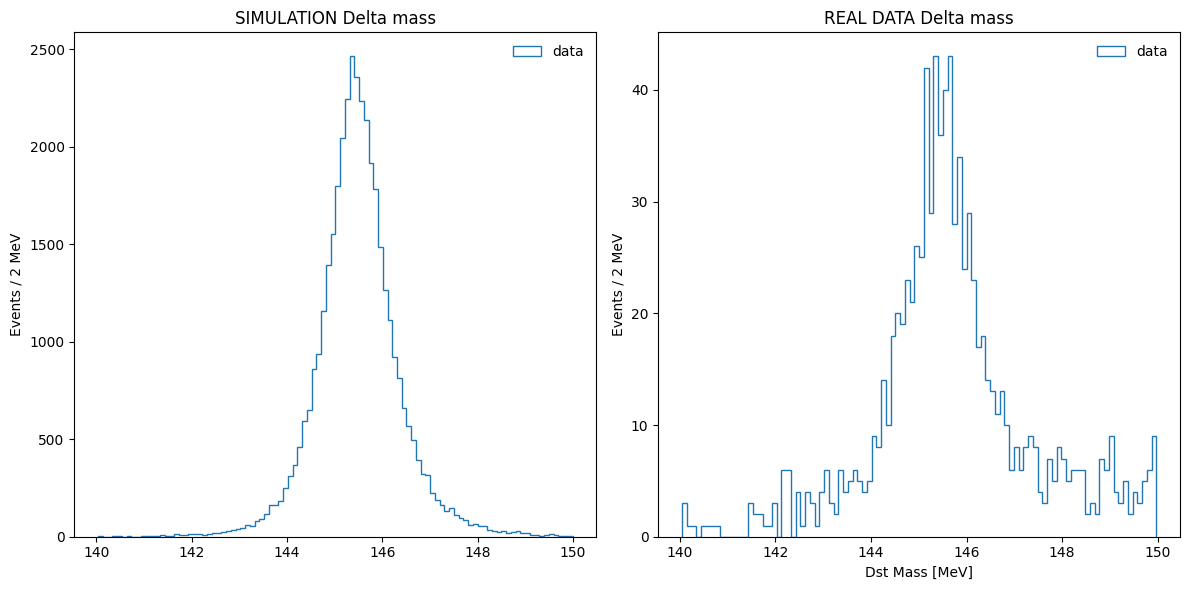

In [173]:
#Delta mass comparing 

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION Dst mass
axes[0].hist(simu_data.query(Selection)['delta_mass'], bins=100, histtype='step', label='data')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION Delta mass')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA Dst mass
axes[1].hist(real_data.query(Selection)['delta_mass'], bins=100, histtype='step', label='data')
axes[1].set_xlabel('Dst Mass [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA Delta mass')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

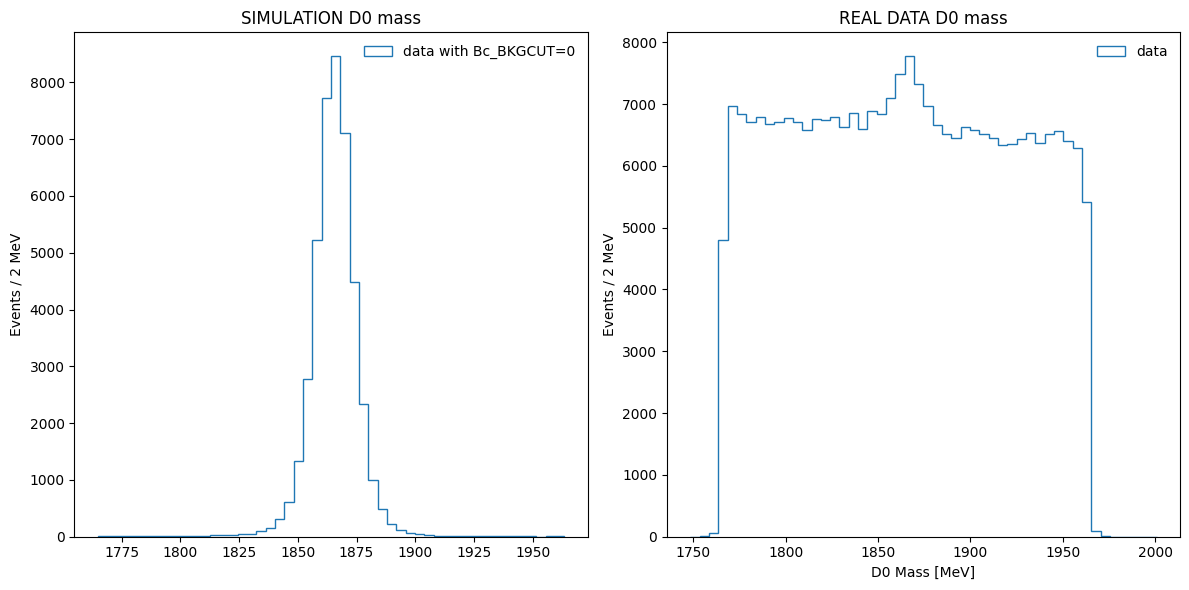

In [123]:
#D0 mass comparing without cutting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION D0 mass
axes[0].hist(simu_data['D0_M'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION D0 mass')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA D0 mass
axes[1].hist(real_data['D0_M'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('D0 Mass [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA D0 mass')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

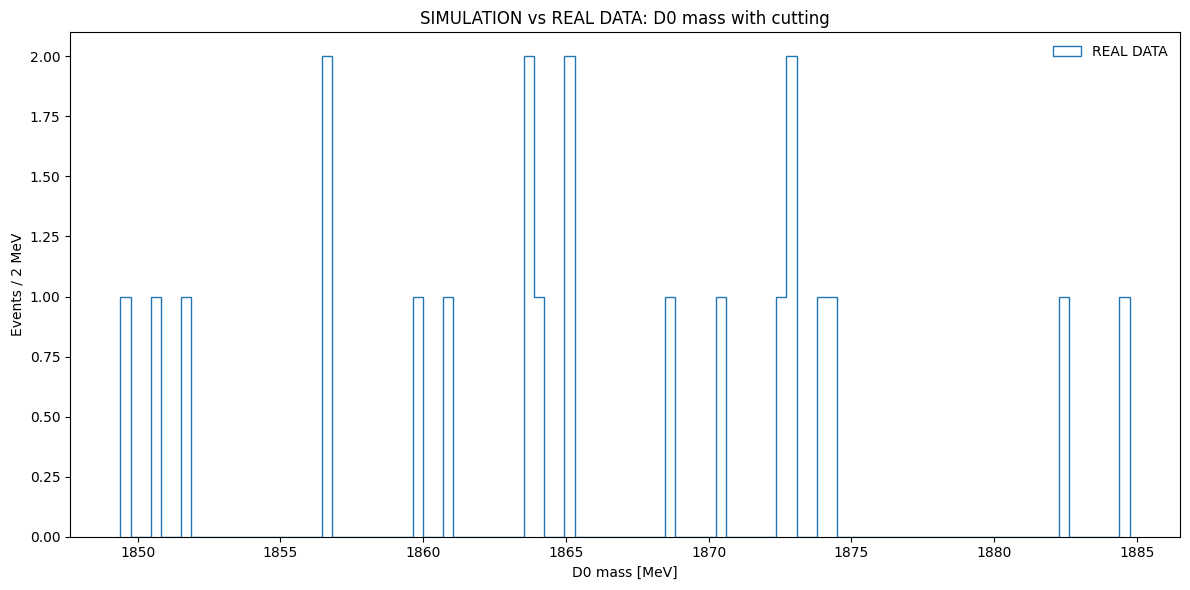

In [124]:
#D0 mass comparing with Notion_selection
fig, ax = plt.subplots(figsize=(12, 6))

# ax.hist(simu_data.query(Notion_selection)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Notion_selection)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('D0 mass [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: D0 mass with cutting')

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

Mean of SIMULATION (Bc_BKGCUT=0): 1865.28 MeV
Mean of REAL DATA: 1863.66 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL IPCHI2_OWNPV cutting: 1865.46 MeV
Mean of REAL DATA with NOTION MODEL IPCHI2_OWNPV cutting: 1865.62 MeV


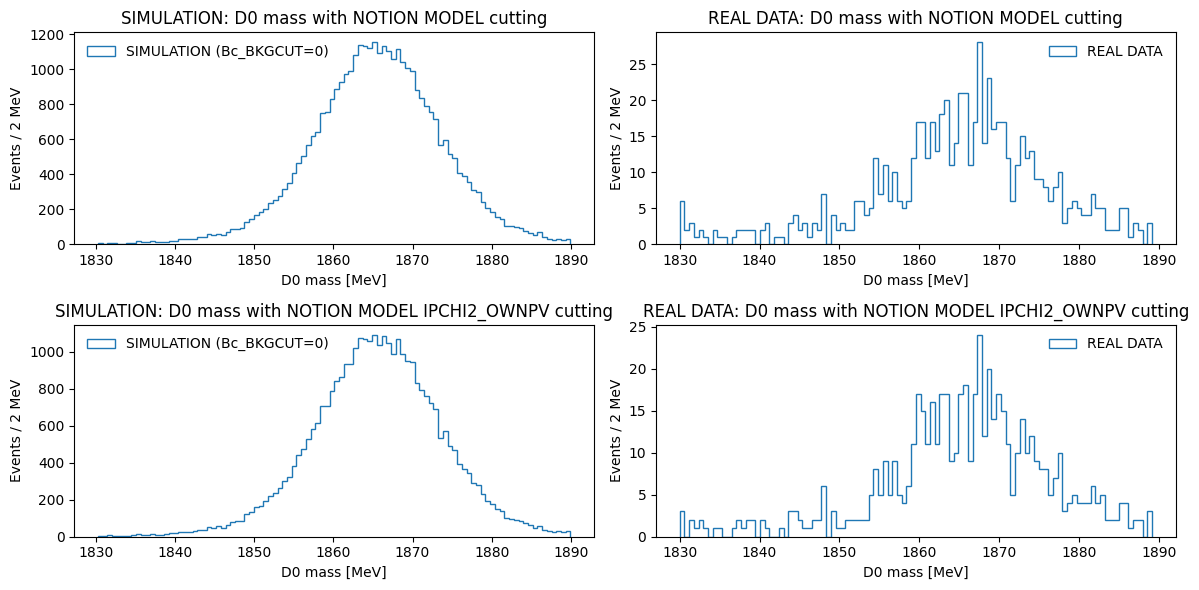

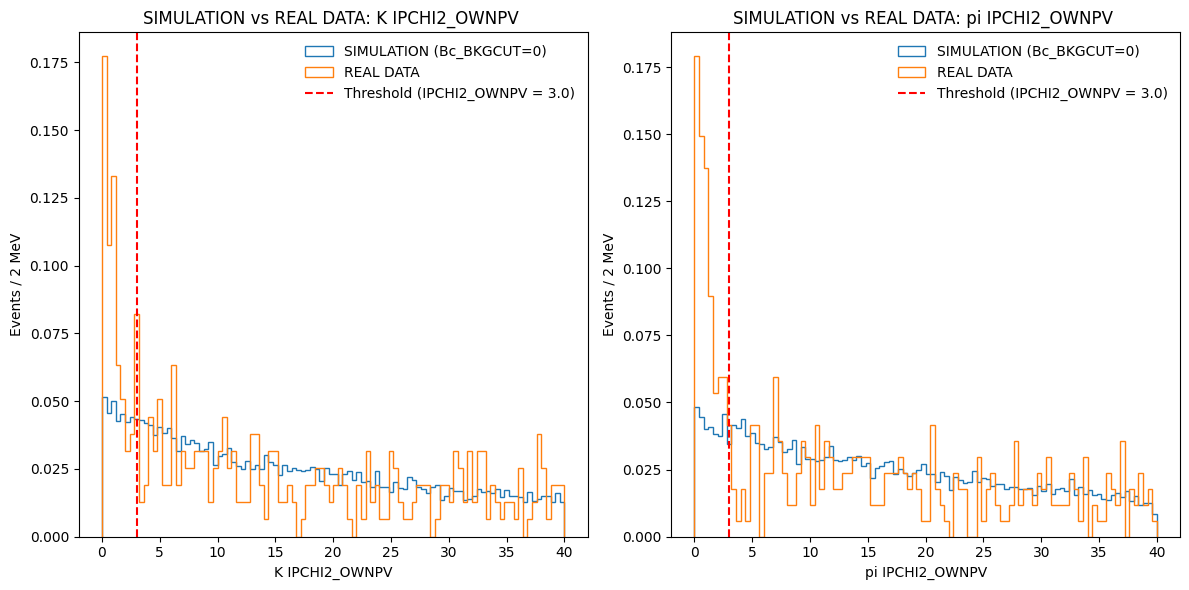

In [ ]:
#IPCHI2_OWNPV checking ((K_IPCHI2_OWNPV>3.0) & (pi_IPCHI2_OWNPV>3.0))

import numpy as np

simu_data_true = simu_data['D0_M']
real_data_true = real_data['D0_M']
simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_IPCHI2_OWNPV = simu_data.query(Notion_model_selection_IPCHI2_OWNPV)['D0_M']
real_data_cut_IPCHI2_OWNPV = real_data.query(Notion_model_selection_IPCHI2_OWNPV)['D0_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_IPCHI2_OWNPV = np.mean(simu_data_cut_IPCHI2_OWNPV)
mean_real_data_IPCHI2_OWNPV = np.mean(real_data_cut_IPCHI2_OWNPV)

print(f'Mean of SIMULATION (Bc_BKGCUT=0): {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL IPCHI2_OWNPV cutting: {mean_simu_data_IPCHI2_OWNPV:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL IPCHI2_OWNPV cutting: {mean_real_data_IPCHI2_OWNPV:.2f} MeV')


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_IPCHI2_OWNPV)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL IPCHI2_OWNPV cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_IPCHI2_OWNPV)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL IPCHI2_OWNPV cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_without_selection_IPCHI2_OWNPV)['K_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,40), label='SIMULATION (Bc_BKGCUT=0)')
axes[0].hist(real_data.query(Notion_model_without_selection_IPCHI2_OWNPV)['K_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,40), label='REAL DATA')
axes[0].axvline(x=3.0, color='red', linestyle='--', label='Threshold (IPCHI2_OWNPV = 3.0)')
axes[0].set_xlabel('K IPCHI2_OWNPV')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: K IPCHI2_OWNPV ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_without_selection_IPCHI2_OWNPV)['pi_IPCHI2_OWNPV'], density = True, bins=100, histtype='step', range=(0,40), label='SIMULATION (Bc_BKGCUT=0)')
axes[1].hist(real_data.query(Notion_model_without_selection_IPCHI2_OWNPV)['pi_IPCHI2_OWNPV'], density = True, bins=100, histtype='step', range=(0,40), label='REAL DATA')
axes[1].axvline(x=3.0, color='red', linestyle='--', label='Threshold (IPCHI2_OWNPV = 3.0)')
axes[1].set_xlabel('pi IPCHI2_OWNPV')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: pi IPCHI2_OWNPV ')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()


Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL D0_ENDVERTEX_CHI2 cutting: 1865.38 MeV
Mean of REAL DATA with NOTION MODEL D0_ENDVERTEX_CHI2 cutting: 1865.69 MeV


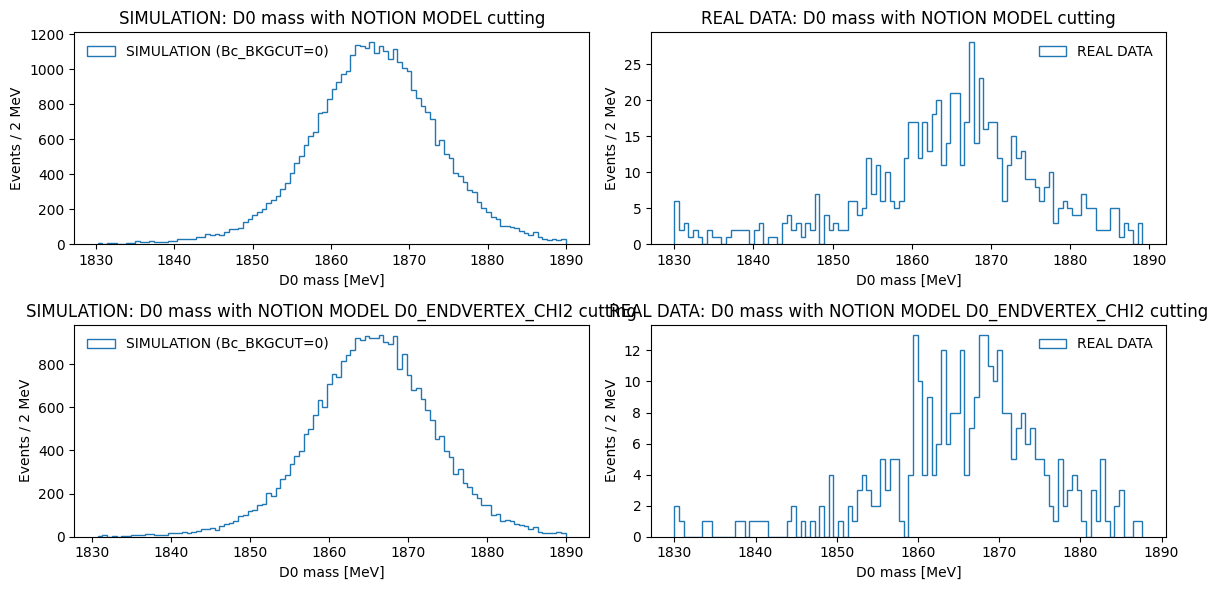

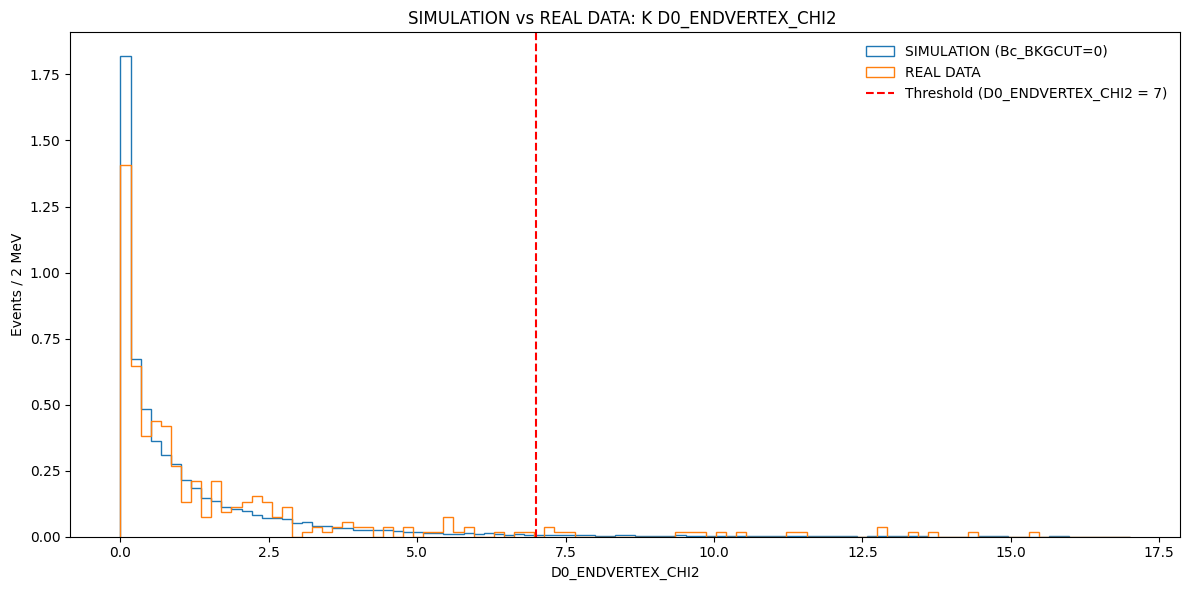

In [126]:
#D0_ENDVERTEX_CHI2 checking (D0_ENDVERTEX_CHI2<9)

simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_D0_ENDVERTEX_CHI2 = simu_data.query(Notion_model_selection_D0_ENDVERTEX_CHI2)['D0_M']
real_data_cut_D0_ENDVERTEX_CHI2 = real_data.query(Notion_model_selection_D0_ENDVERTEX_CHI2)['D0_M']

mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_D0_ENDVERTEX_CHI2 = np.mean(simu_data_cut_D0_ENDVERTEX_CHI2)
mean_real_data_D0_ENDVERTEX_CHI2 = np.mean(real_data_cut_D0_ENDVERTEX_CHI2)

print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL D0_ENDVERTEX_CHI2 cutting: {mean_simu_data_D0_ENDVERTEX_CHI2:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL D0_ENDVERTEX_CHI2 cutting: {mean_real_data_D0_ENDVERTEX_CHI2:.2f} MeV')


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_D0_ENDVERTEX_CHI2)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL D0_ENDVERTEX_CHI2 cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_D0_ENDVERTEX_CHI2)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL D0_ENDVERTEX_CHI2 cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_without_selection_D0_ENDVERTEX_CHI2)['D0_ENDVERTEX_CHI2'], bins=100, histtype='step',density = True, range=(0,17), label='SIMULATION (Bc_BKGCUT=0)')
axes.hist(real_data.query(Notion_model_without_selection_D0_ENDVERTEX_CHI2)['D0_ENDVERTEX_CHI2'], bins=100, histtype='step',density = True, range=(0,17), label='REAL DATA')
axes.axvline(x=7, color='red', linestyle='--', label='Threshold (D0_ENDVERTEX_CHI2 = 7)')
axes.set_xlabel('D0_ENDVERTEX_CHI2')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: K D0_ENDVERTEX_CHI2 ')
axes.legend(frameon=False)

plt.tight_layout()

plt.show()

Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL TRACK_CHI2NDOF cutting: 1865.37 MeV
Mean of REAL DATA with NOTION MODEL TRACK_CHI2NDOF cutting: 1865.12 MeV


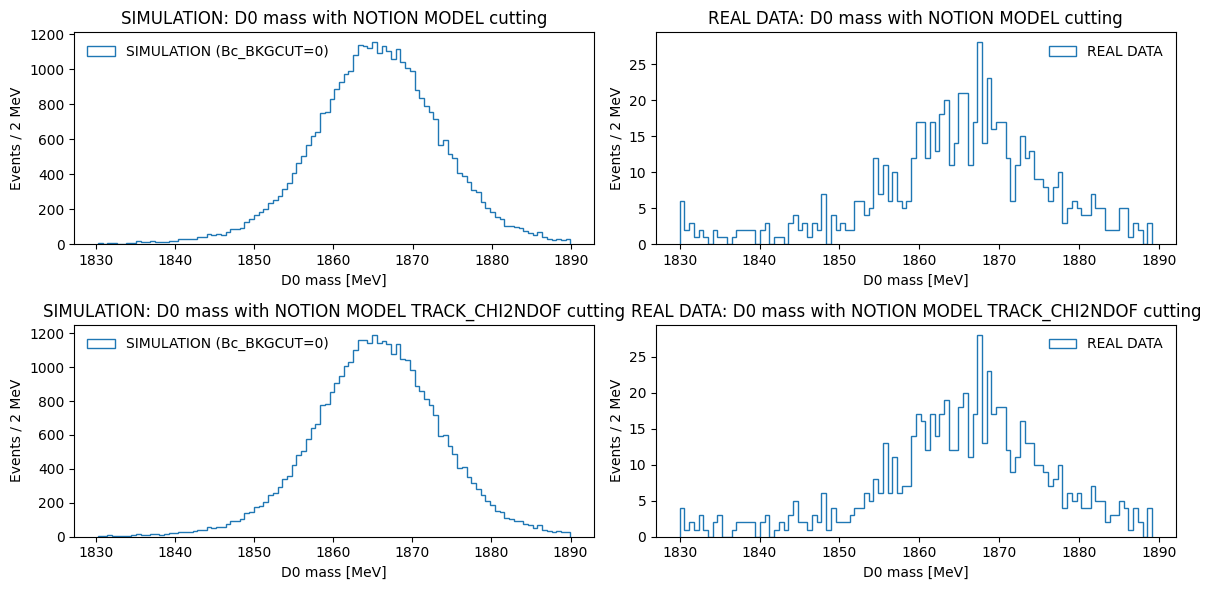

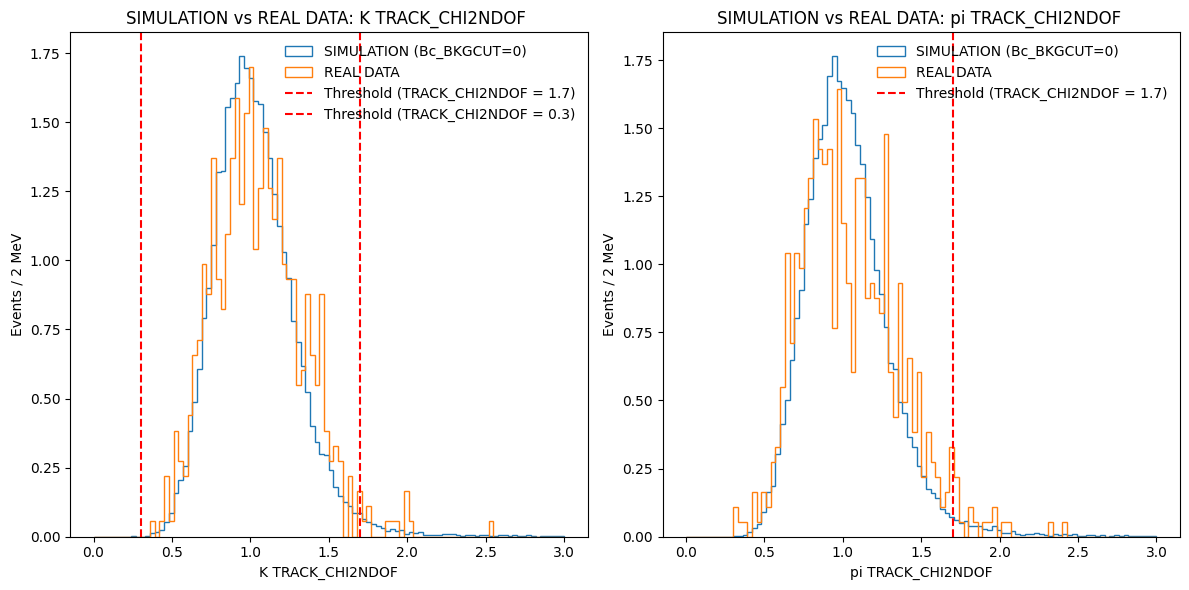

In [162]:
#TRACK_CHI2NDOF checking ((K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & (K_TRACK_CHI2NDOF>0.3) & (pi_TRACK_CHI2NDOF>0.3))

simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_TRACK_CHI2NDOF = simu_data.query(Notion_model_selection_TRACK_CHI2NDOF)['D0_M']
real_data_cut_TRACK_CHI2NDOF = real_data.query(Notion_model_selection_TRACK_CHI2NDOF)['D0_M']

mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_TRACK_CHI2NDOF = np.mean(simu_data_cut_TRACK_CHI2NDOF)
mean_real_data_TRACK_CHI2NDOF = np.mean(real_data_cut_TRACK_CHI2NDOF)

print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL TRACK_CHI2NDOF cutting: {mean_simu_data_TRACK_CHI2NDOF:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL TRACK_CHI2NDOF cutting: {mean_real_data_TRACK_CHI2NDOF:.2f} MeV')


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_TRACK_CHI2NDOF)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL TRACK_CHI2NDOF cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_TRACK_CHI2NDOF)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL TRACK_CHI2NDOF cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_without_selection_TRACK_CHI2NDOF)['K_TRACK_CHI2NDOF'], bins=100, histtype='step',density = True, range=(0,3), label='SIMULATION (Bc_BKGCUT=0)')
axes[0].hist(real_data.query(Notion_model_without_selection_TRACK_CHI2NDOF)['K_TRACK_CHI2NDOF'], bins=100, histtype='step',density = True, range=(0,3), label='REAL DATA')
axes[0].axvline(x=1.7, color='red', linestyle='--', label='Threshold (TRACK_CHI2NDOF = 1.7)')
axes[0].axvline(x=0.3, color='red', linestyle='--', label='Threshold (TRACK_CHI2NDOF = 0.3)')
axes[0].set_xlabel('K TRACK_CHI2NDOF')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: K TRACK_CHI2NDOF ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_without_selection_TRACK_CHI2NDOF)['pi_TRACK_CHI2NDOF'], bins=100, histtype='step',density = True, range=(0,3), label='SIMULATION (Bc_BKGCUT=0)')
axes[1].hist(real_data.query(Notion_model_without_selection_TRACK_CHI2NDOF)['pi_TRACK_CHI2NDOF'], bins=100, histtype='step',density = True, range=(0,3), label='REAL DATA')
axes[1].axvline(x=1.7, color='red', linestyle='--', label='Threshold (TRACK_CHI2NDOF = 1.7)')
axes[1].set_xlabel('pi TRACK_CHI2NDOF')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: pi TRACK_CHI2NDOF ')
axes[1].legend(frameon=False)

plt.tight_layout()

plt.show()

Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL PT cutting: 1865.48 MeV
Mean of REAL DATA with NOTION MODEL PT cutting: 1866.17 MeV


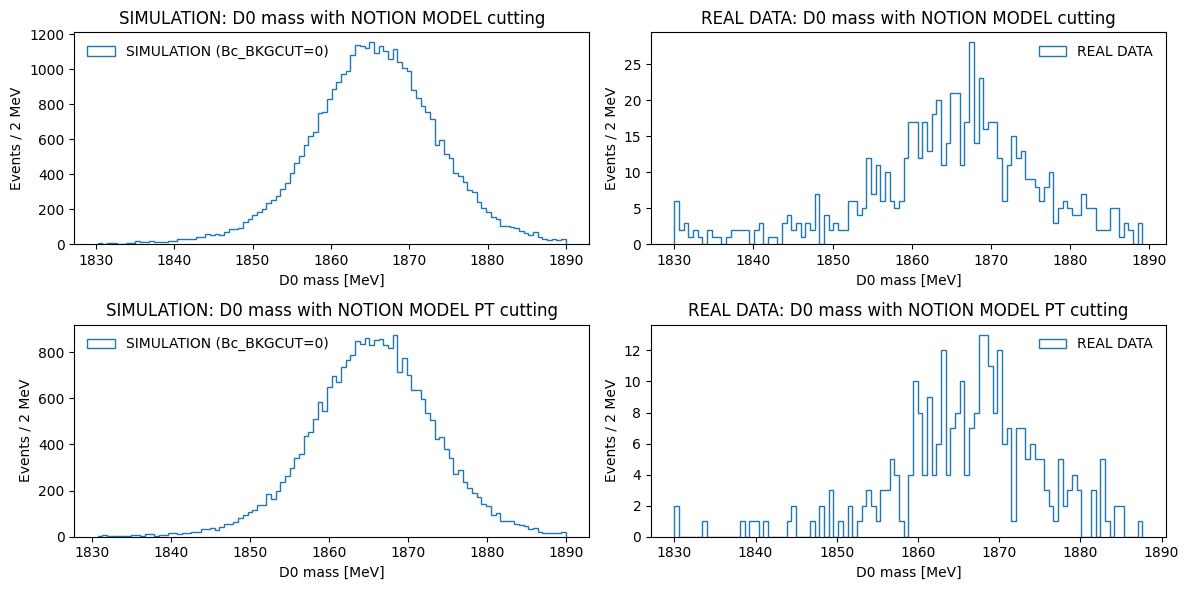

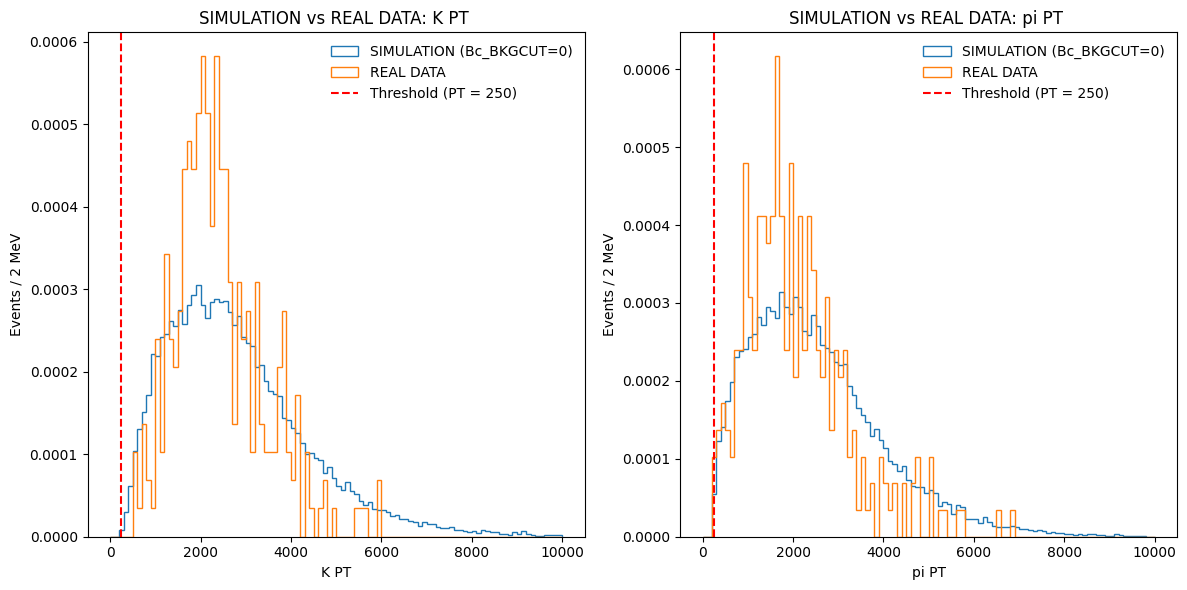

In [163]:
#PT checking ((K_PT>250) & (pi_PT>250))

simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_PT = simu_data.query(Notion_model_selection_PT)['D0_M']
real_data_cut_PT = real_data.query(Notion_model_selection_PT)['D0_M']

mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_PT = np.mean(simu_data_cut_PT)
mean_real_data_PT = np.mean(real_data_cut_PT)

print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL PT cutting: {mean_simu_data_PT:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL PT cutting: {mean_real_data_PT:.2f} MeV')



fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_PT)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL PT cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_PT)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL PT cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_without_selection_PT)['K_PT'], bins=100, histtype='step',density = True, range=(0,10000), label='SIMULATION (Bc_BKGCUT=0)')
axes[0].hist(real_data.query(Notion_model_without_selection_PT)['K_PT'], bins=100, histtype='step',density = True, range=(0,10000), label='REAL DATA')
axes[0].axvline(x=250, color='red', linestyle='--', label='Threshold (PT = 250)')
axes[0].set_xlabel('K PT')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: K PT ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_without_selection_PT)['pi_PT'], bins=100, histtype='step',density = True, range=(0,10000), label='SIMULATION (Bc_BKGCUT=0)')
axes[1].hist(real_data.query(Notion_model_without_selection_PT)['pi_PT'], bins=100, histtype='step',density = True, range=(0,10000), label='REAL DATA')
axes[1].axvline(x=250, color='red', linestyle='--', label='Threshold (PT = 250)')
axes[1].set_xlabel('pi PT')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: pi PT ')
axes[1].legend(frameon=False)

plt.tight_layout()

plt.show()

Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL ProbNNghost cutting: 1865.39 MeV
Mean of REAL DATA with NOTION MODEL ProbNNghost cutting: 1865.48 MeV


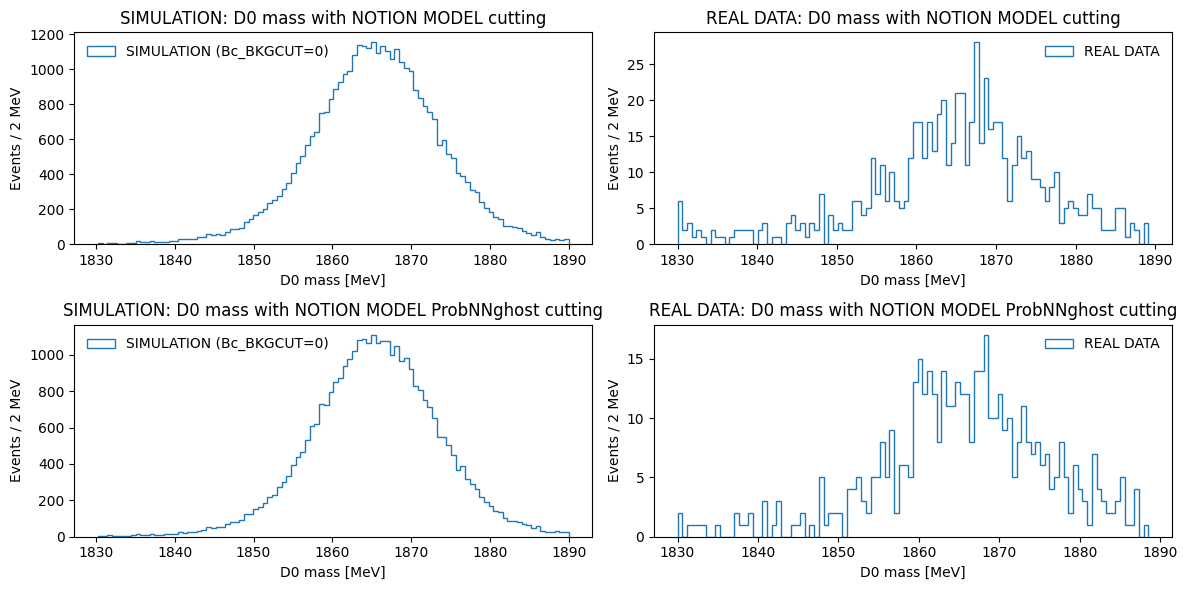

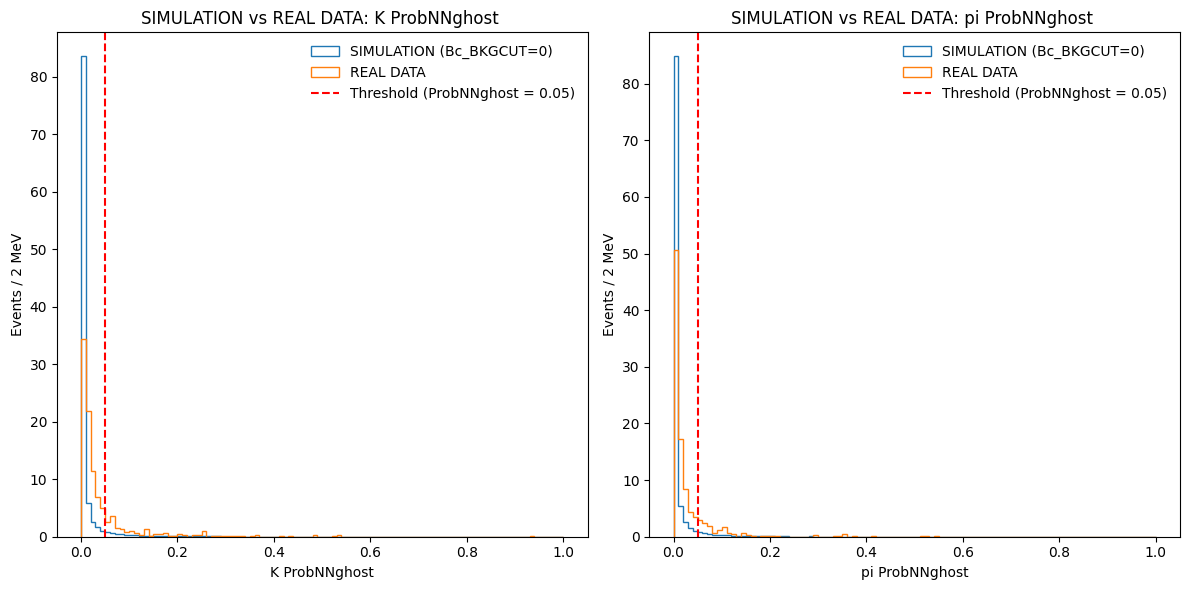

In [129]:
#ProbNNghost checking ((K_ProbNNghost<0.05) & (pi_ProbNNghost<0.05))

simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_ProbNNghost = simu_data.query(Notion_model_selection_ProbNNghost)['D0_M']
real_data_cut_ProbNNghost = real_data.query(Notion_model_selection_ProbNNghost)['D0_M']

mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_ProbNNghost = np.mean(simu_data_cut_ProbNNghost)
mean_real_data_ProbNNghost = np.mean(real_data_cut_ProbNNghost)

print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL ProbNNghost cutting: {mean_simu_data_ProbNNghost:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL ProbNNghost cutting: {mean_real_data_ProbNNghost:.2f} MeV')



fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_ProbNNghost)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL ProbNNghost cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_ProbNNghost)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL ProbNNghost cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_without_selection_ProbNNghost)['K_ProbNNghost'], bins=100, histtype='step',density = True, range=(0,1), label='SIMULATION (Bc_BKGCUT=0)')
axes[0].hist(real_data.query(Notion_model_without_selection_ProbNNghost)['K_ProbNNghost'], bins=100, histtype='step',density = True, range=(0,1), label='REAL DATA')
axes[0].axvline(x=0.05, color='red', linestyle='--', label='Threshold (ProbNNghost = 0.05)')
axes[0].set_xlabel('K ProbNNghost')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: K ProbNNghost ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_without_selection_ProbNNghost)['pi_ProbNNghost'], bins=100, histtype='step',density = True, range=(0,1), label='SIMULATION (Bc_BKGCUT=0)')
axes[1].hist(real_data.query(Notion_model_without_selection_ProbNNghost)['pi_ProbNNghost'], bins=100, histtype='step',density = True, range=(0,1), label='REAL DATA')
axes[1].axvline(x=0.05, color='red', linestyle='--', label='Threshold (ProbNNghost = 0.05)')
axes[1].set_xlabel('pi ProbNNghost')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: pi ProbNNghost ')
axes[1].legend(frameon=False)

plt.tight_layout()

plt.show()

Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 1865.41 MeV
Mean of REAL DATA with NOTION MODEL cutting: 1864.77 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL ProbNNkpi cutting: 1865.38 MeV
Mean of REAL DATA with NOTION MODEL ProbNNkpi cutting: 1865.69 MeV


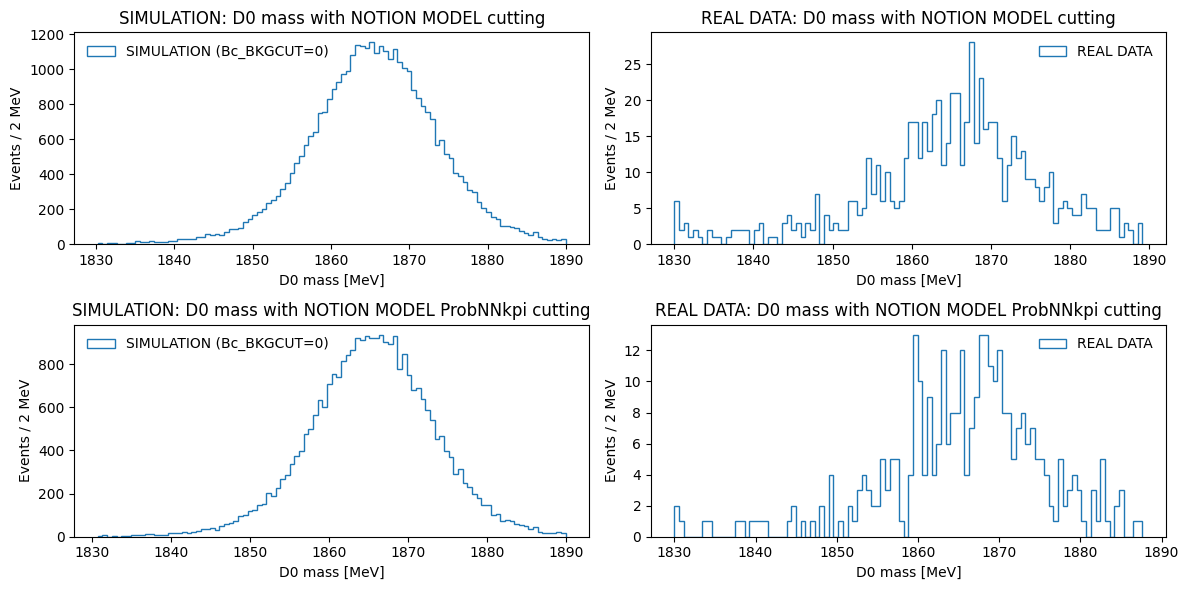

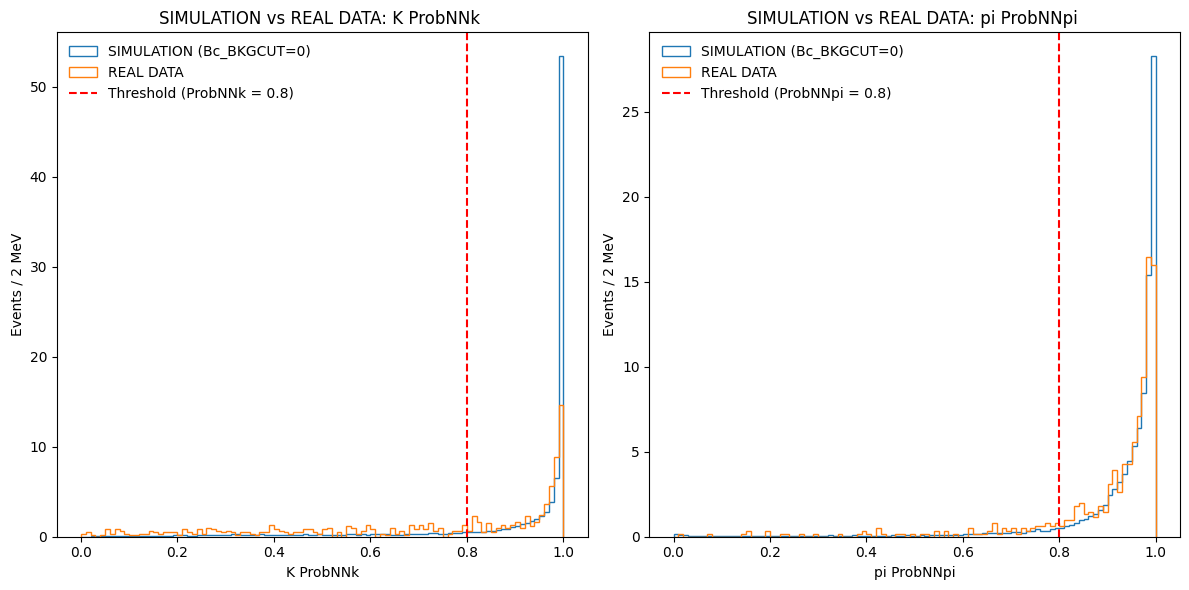

In [ ]:
#ProbNNkpi checking ((K_ProbNNk>0.8) & (pi_ProbNNpi>0.8))

simu_data_cut = simu_data.query(Notion_model_selection_D0)['D0_M']
real_data_cut = real_data.query(Notion_model_selection_D0)['D0_M']
simu_data_cut_ProbNNkpi = simu_data.query(Notion_model_selection_ProbNNkpi)['D0_M']
real_data_cut_ProbNNkpi = real_data.query(Notion_model_selection_ProbNNkpi)['D0_M']

mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)
mean_simu_data_ProbNNkpi = np.mean(simu_data_cut_ProbNNkpi)
mean_real_data_ProbNNkpi = np.mean(real_data_cut_ProbNNkpi)

print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL ProbNNkpi cutting: {mean_simu_data_ProbNNkpi:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL ProbNNkpi cutting: {mean_real_data_ProbNNkpi:.2f} MeV')



fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[0,0].set_xlabel('D0 mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: D0 mass with NOTION MODEL cutting')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data.query(Notion_model_selection_D0)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('D0 mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: D0 mass with NOTION MODEL cutting')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_ProbNNkpi)['D0_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
ax[1,0].set_xlabel('D0 mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: D0 mass with NOTION MODEL ProbNNkpi cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_ProbNNkpi)['D0_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('D0 mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: D0 mass with NOTION MODEL ProbNNkpi cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_without_selection_ProbNNkpi)['K_ProbNNk'], bins=100, histtype='step',density = True, range=(0,1), label='SIMULATION (Bc_BKGCUT=0)')
axes[0].hist(real_data.query(Notion_model_without_selection_ProbNNkpi)['K_ProbNNk'], bins=100, histtype='step',density = True, range=(0,1), label='REAL DATA')
axes[0].axvline(x=0.8, color='red', linestyle='--', label='Threshold (ProbNNk = 0.8)')
axes[0].set_xlabel('K ProbNNk')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: K ProbNNk ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_without_selection_ProbNNkpi)['pi_ProbNNpi'], bins=100, histtype='step',density = True, range=(0,1), label='SIMULATION (Bc_BKGCUT=0)')
axes[1].hist(real_data.query(Notion_model_without_selection_ProbNNkpi)['pi_ProbNNpi'], bins=100, histtype='step',density = True, range=(0,1), label='REAL DATA')
axes[1].axvline(x=0.8, color='red', linestyle='--', label='Threshold (ProbNNpi = 0.8)')
axes[1].set_xlabel('pi ProbNNpi')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: pi ProbNNpi ')
axes[1].legend(frameon=False)

plt.tight_layout()

plt.show()


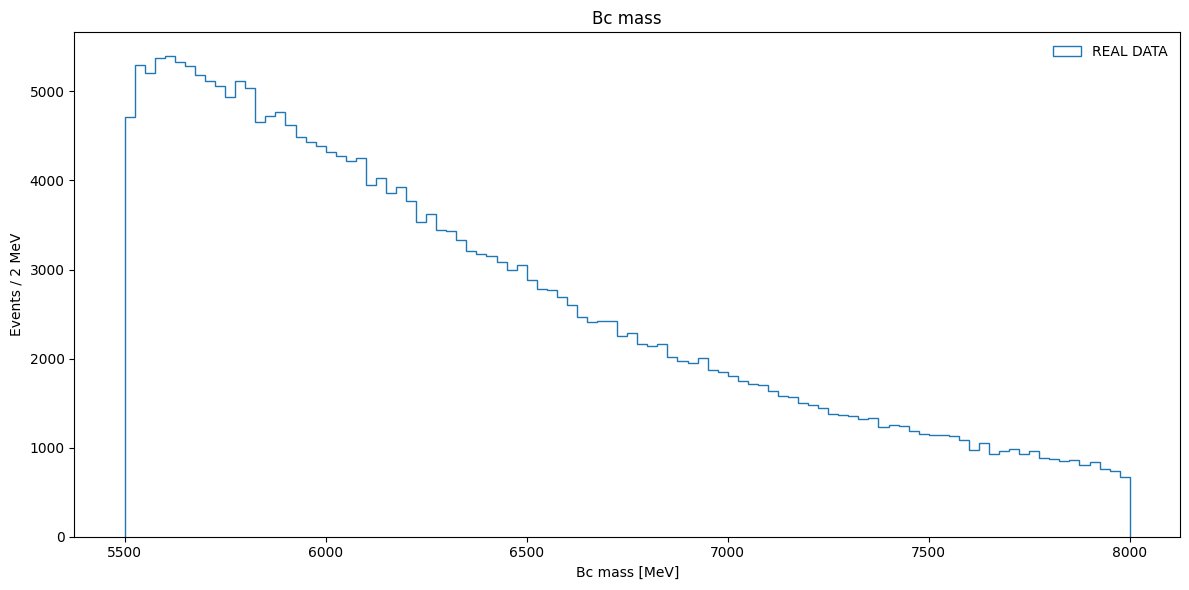

In [131]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.hist(real_data['Bc_M'], bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('Bc mass [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('Bc mass')

ax.legend(frameon=False)


plt.tight_layout()

plt.show()

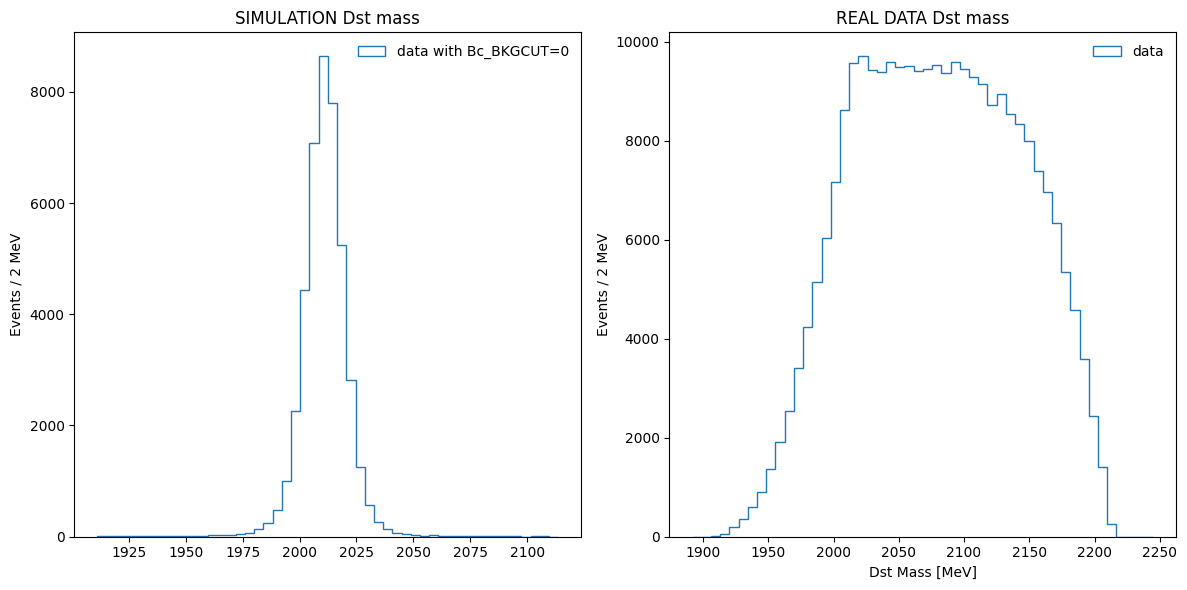

In [132]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION Dst mass
axes[0].hist(simu_data['Dst_M'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION Dst mass')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA Dst mass
axes[1].hist(real_data['Dst_M'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('Dst Mass [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA Dst mass')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

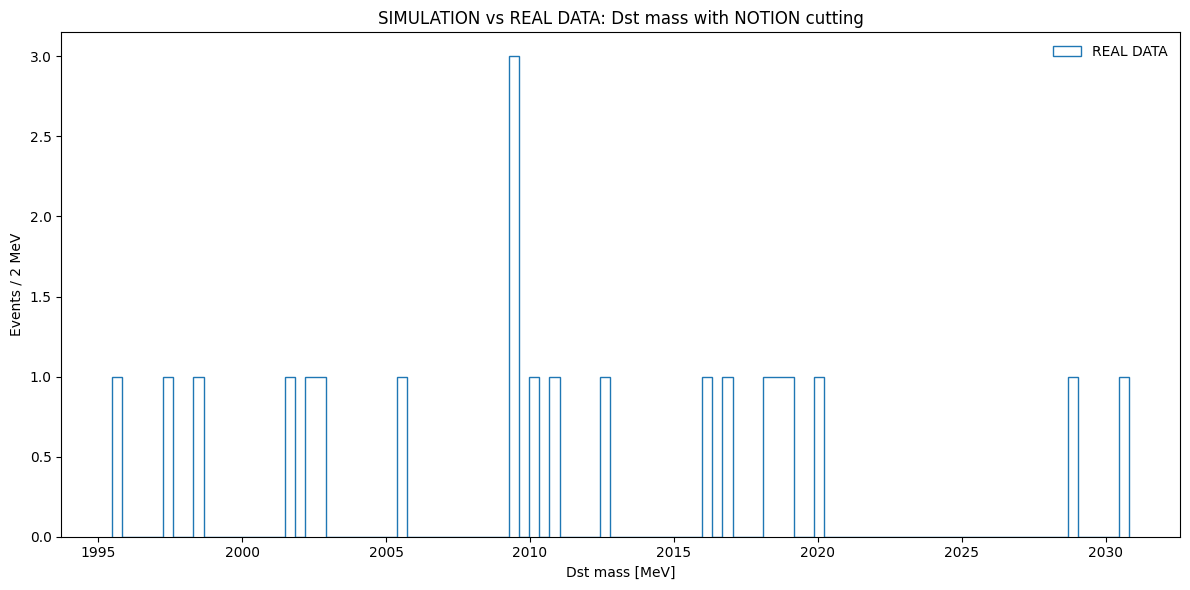

In [133]:
fig, ax = plt.subplots(figsize=(12, 6))

# ax.hist(simu_data.query(Notion_selection)['Dst_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Notion_selection)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('Dst mass [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: Dst mass with NOTION cutting')

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

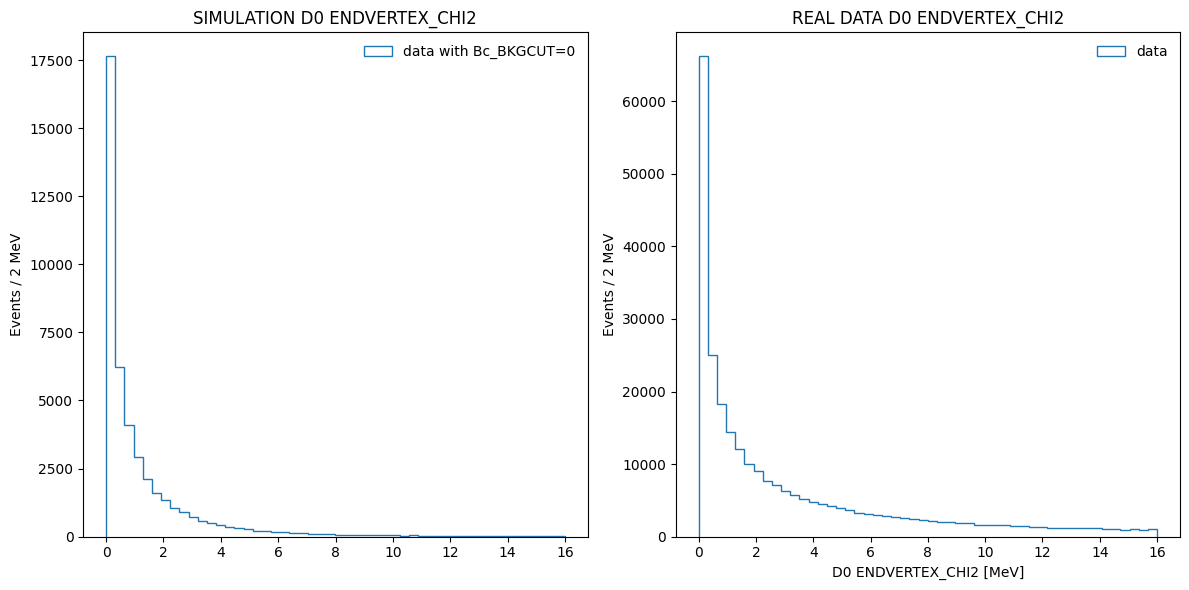

In [134]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION D0 ENDVERTEX_CHI2
axes[0].hist(simu_data['D0_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION D0 ENDVERTEX_CHI2')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA D0 ENDVERTEX_CHI2
axes[1].hist(real_data['D0_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('D0 ENDVERTEX_CHI2 [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA D0 ENDVERTEX_CHI2')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

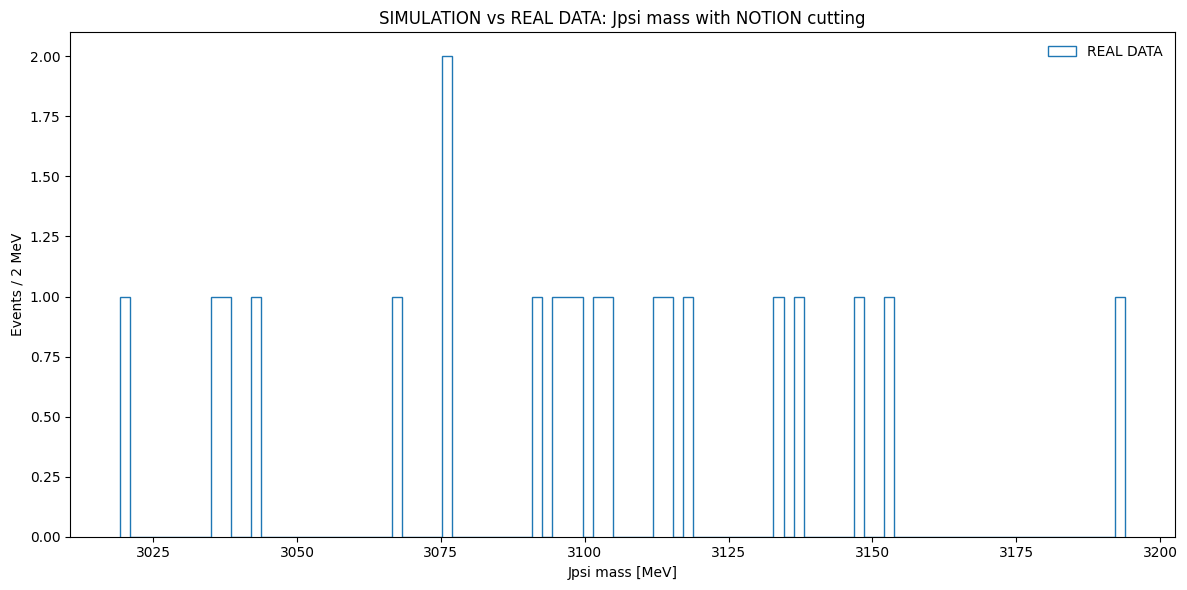

In [135]:
fig, ax = plt.subplots(figsize=(12, 6))

# ax.hist(simu_data.query(Notion_selection)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Notion_selection)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('Jpsi mass [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: Jpsi mass with NOTION cutting')

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

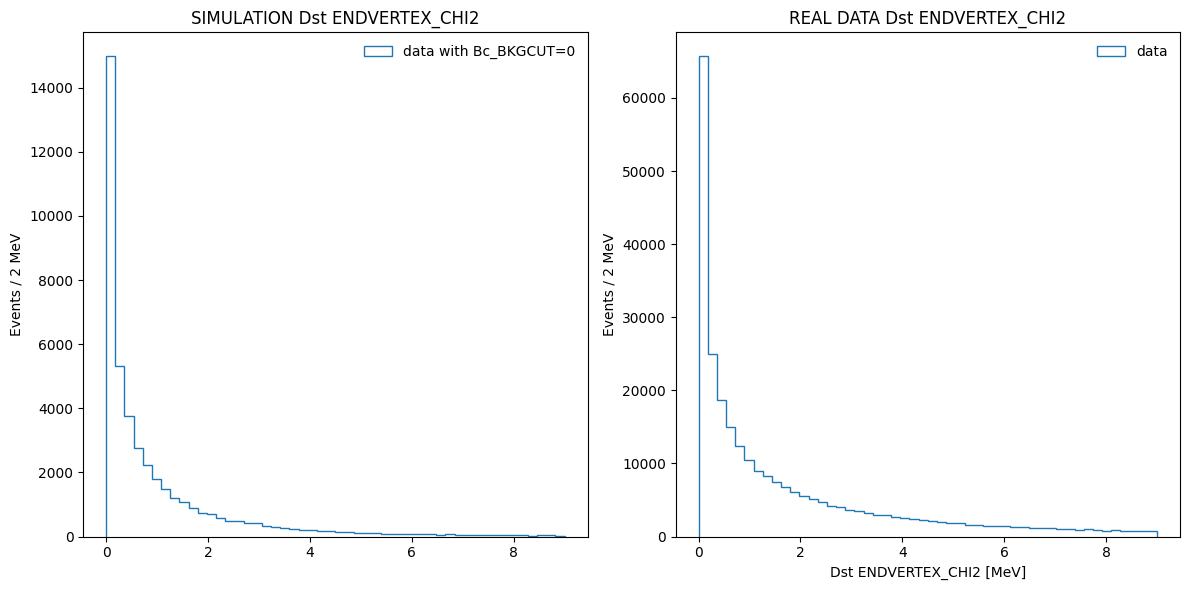

In [136]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION Dst ENDVERTEX_CHI2
axes[0].hist(simu_data['Dst_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION Dst ENDVERTEX_CHI2')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA Dst ENDVERTEX_CHI2
axes[1].hist(real_data['Dst_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('Dst ENDVERTEX_CHI2 [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA Dst ENDVERTEX_CHI2')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

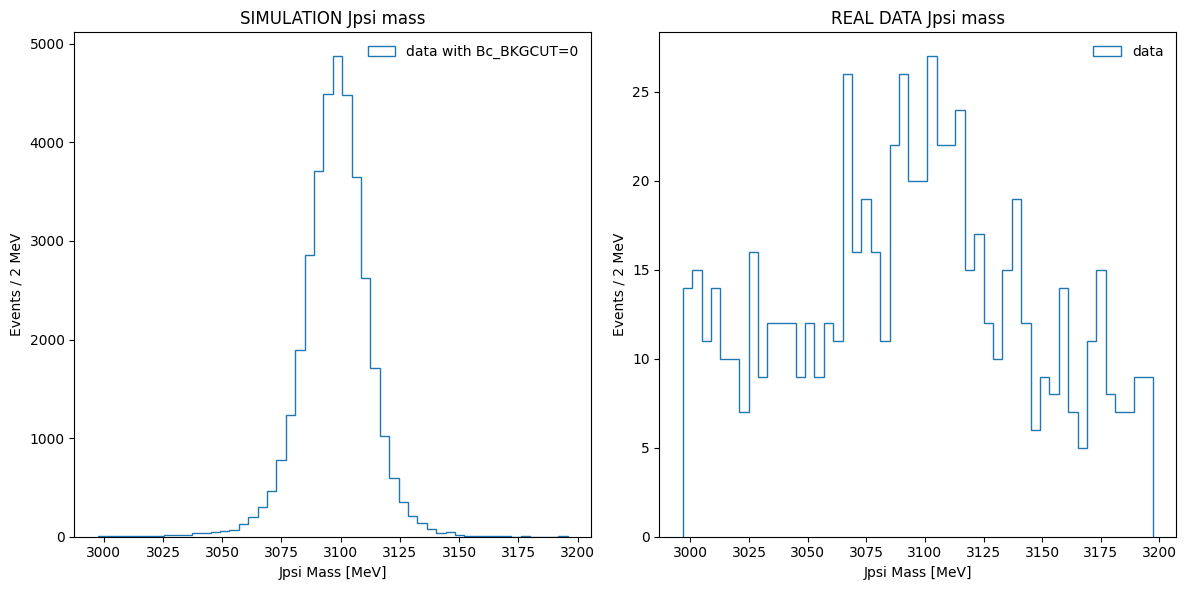

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION Jpsi mass
axes[0].hist(simu_data.query(Notion_model_selection_D0)['Jpsi_M'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('Jpsi Mass [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION Jpsi mass')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA Jpsi mass
axes[1].hist(real_data.query(Notion_model_selection_D0)['Jpsi_M'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('Jpsi Mass [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA Jpsi mass')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

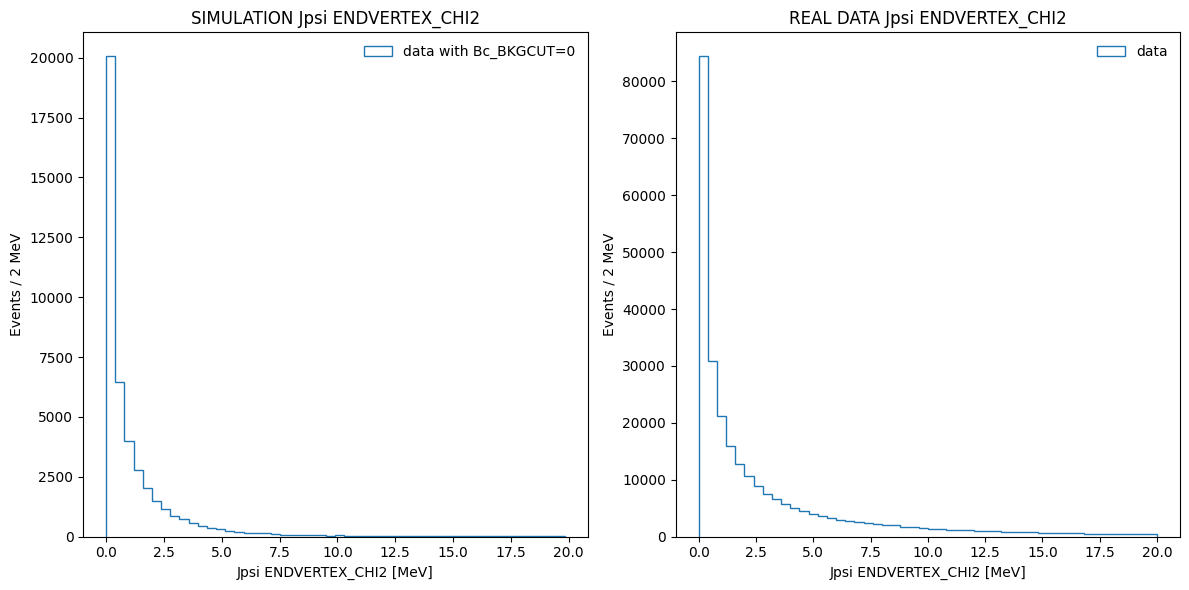

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION Jpsi ENDVERTEX_CHI2
axes[0].hist(simu_data['Jpsi_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('Jpsi ENDVERTEX_CHI2 [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION Jpsi ENDVERTEX_CHI2')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA Jpsi ENDVERTEX_CHI2
axes[1].hist(real_data['Jpsi_ENDVERTEX_CHI2'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('Jpsi ENDVERTEX_CHI2 [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA Jpsi ENDVERTEX_CHI2')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

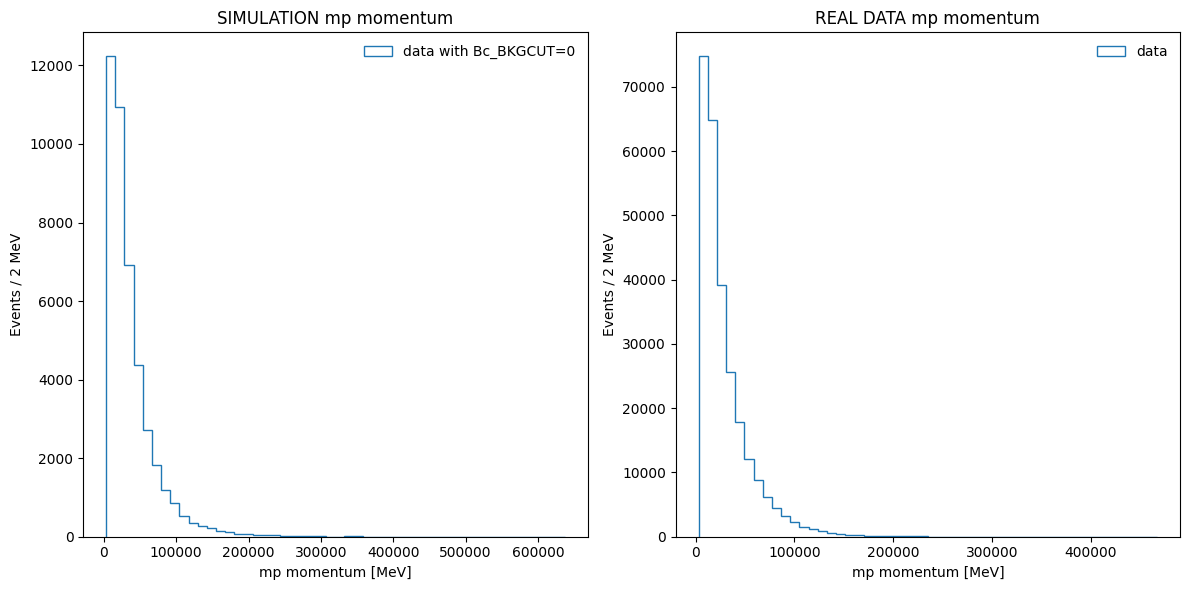

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mp momentum
axes[0].hist(simu_data['mp_P'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mp momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mp momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA mp momentum
axes[1].hist(real_data['mp_P'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('mp momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mp momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

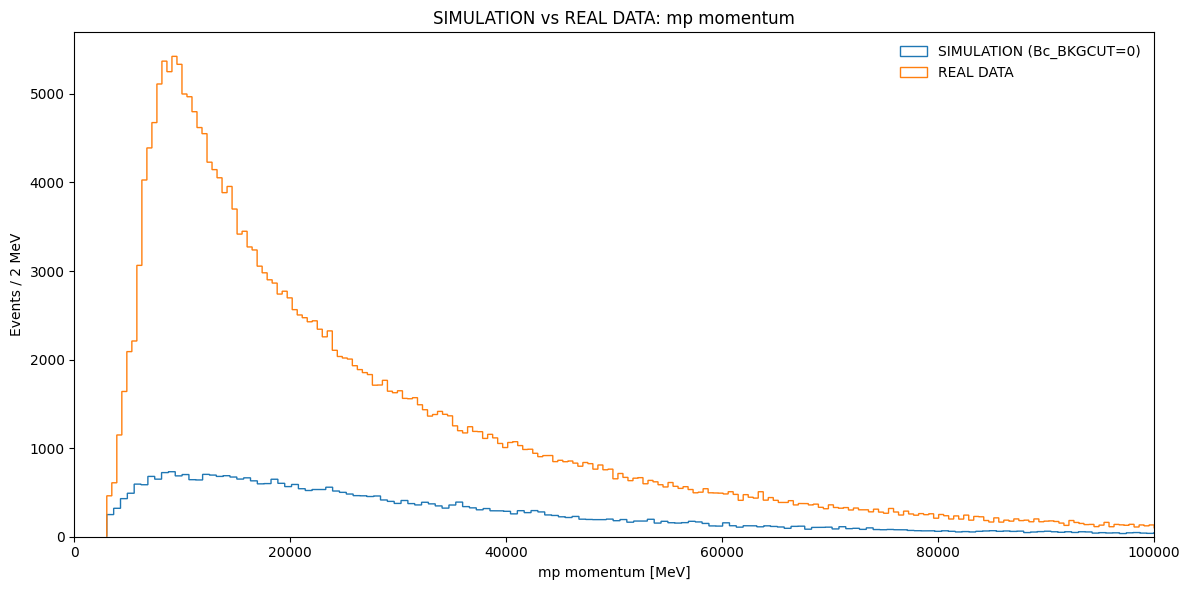

In [140]:

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data['mp_P'], bins=1000, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data['mp_P'], bins=1000, histtype='step', label='REAL DATA')
ax.set_xlabel('mp momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: mp momentum')

ax.set_xlim(0, 100000)

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

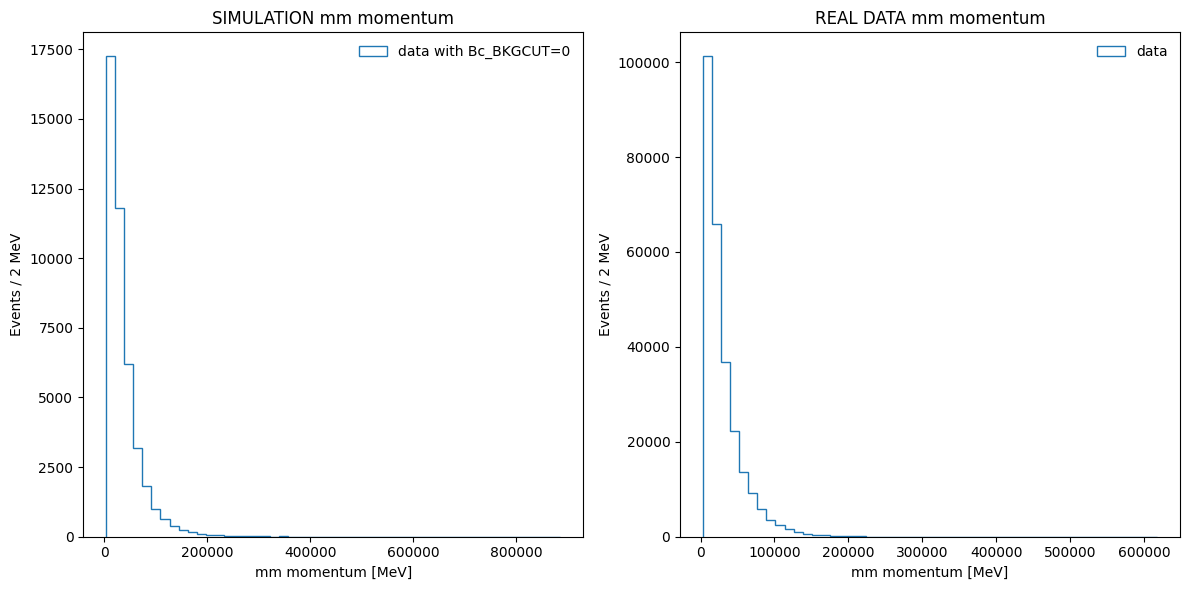

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mm momentum
axes[0].hist(simu_data['mm_P'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mm momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mm momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA mm momentum
axes[1].hist(real_data['mm_P'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('mm momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mm momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

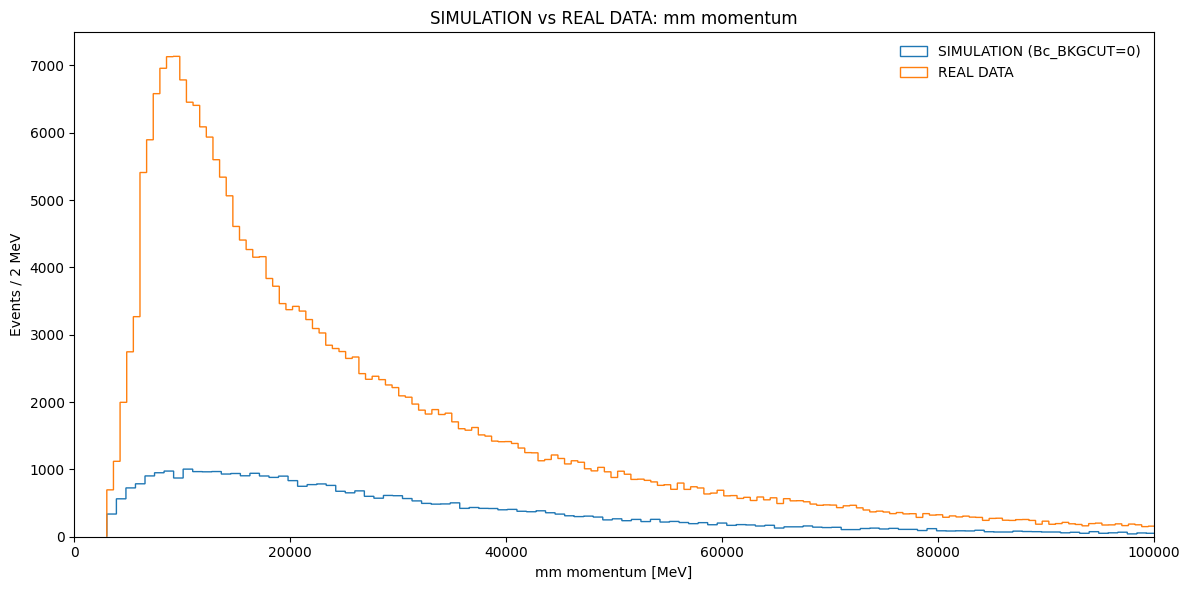

In [142]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data['mm_P'], bins=1000, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data['mm_P'], bins=1000, histtype='step', label='REAL DATA')
ax.set_xlabel('mm momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: mm momentum')

ax.set_xlim(0, 100000)

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

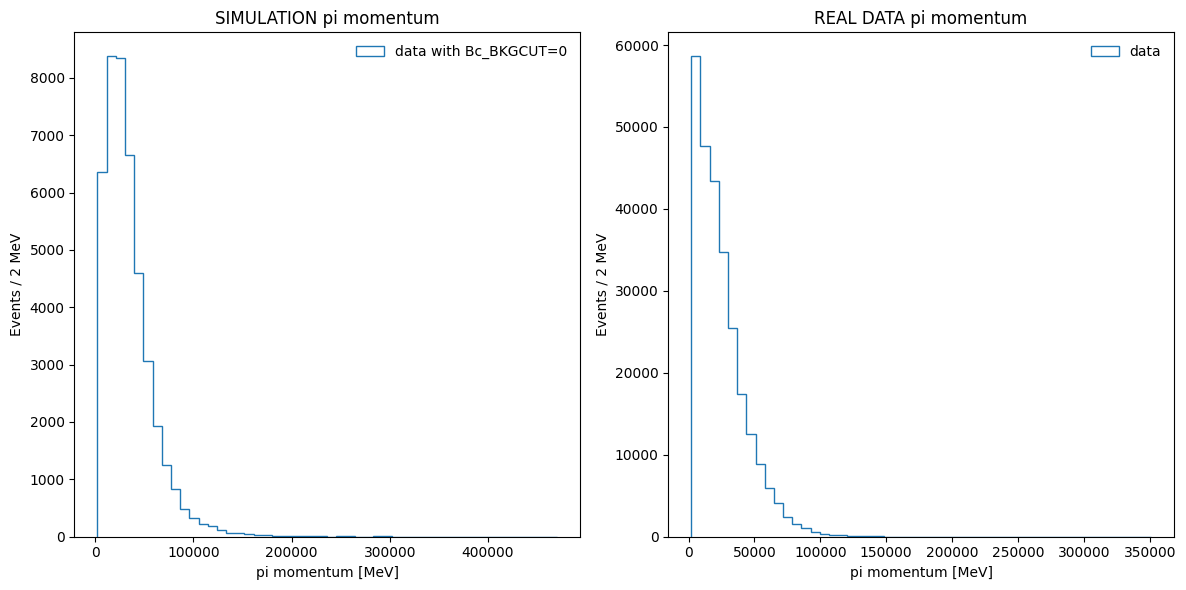

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi momentum
axes[0].hist(simu_data['pi_P'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi momentum
axes[1].hist(real_data['pi_P'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

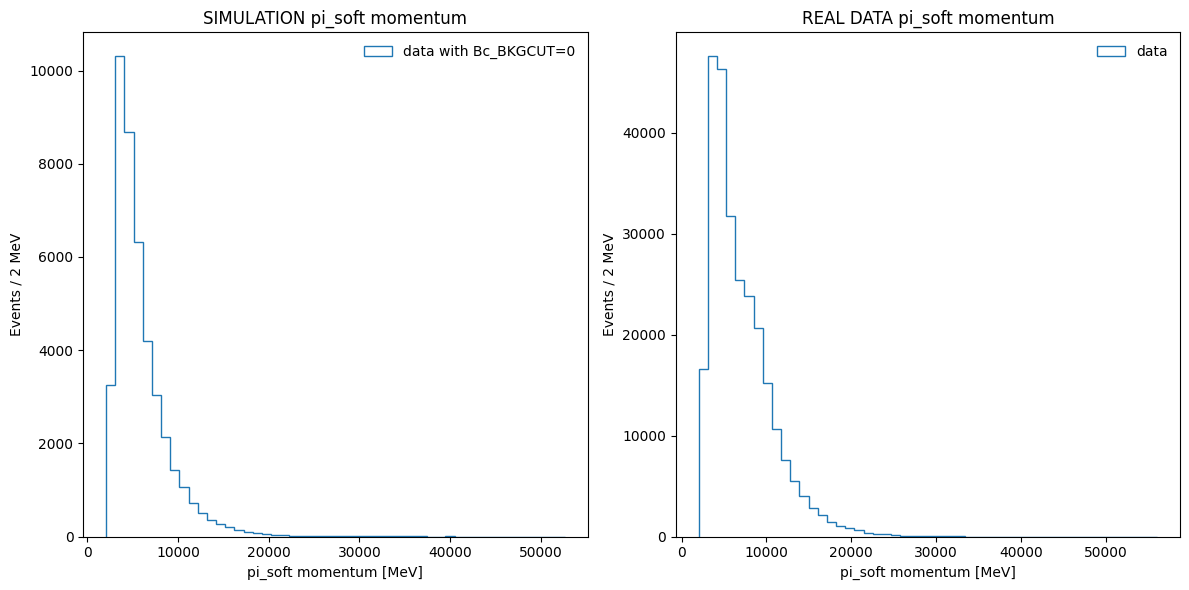

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi_soft momentum
axes[0].hist(simu_data['pi_soft_P'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi_soft momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi_soft momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi_soft momentum
axes[1].hist(real_data['pi_soft_P'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi_soft momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi_soft momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

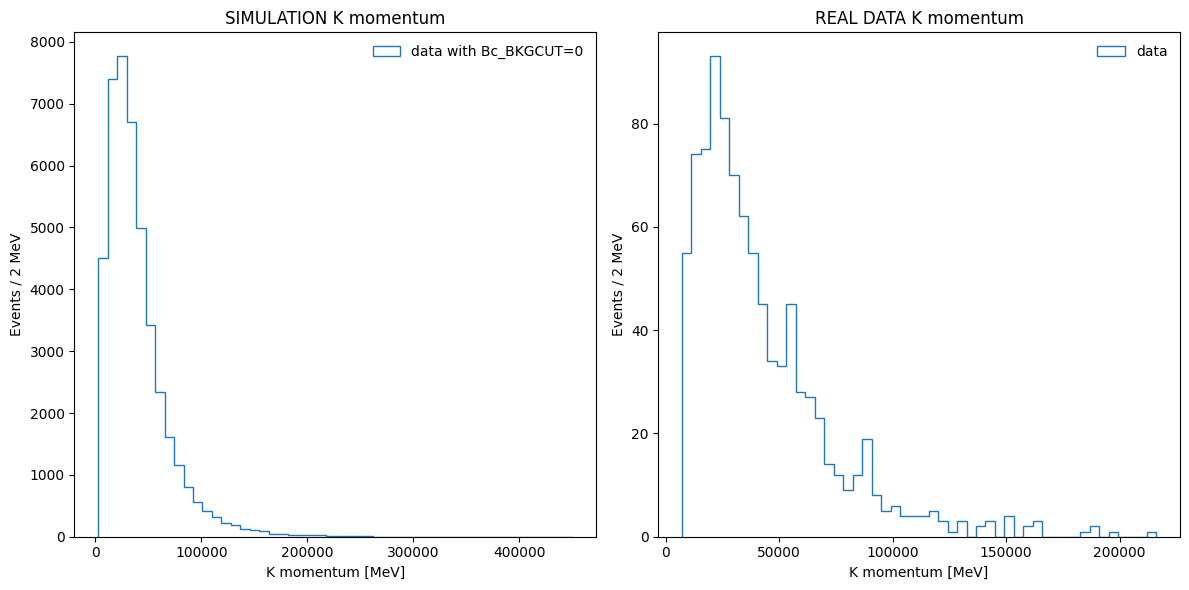

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION K momentum
axes[0].hist(simu_data['K_P'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('K momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION K momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA K momentum
axes[1].hist(real_data.query(Selection)['K_P'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('K momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA K momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

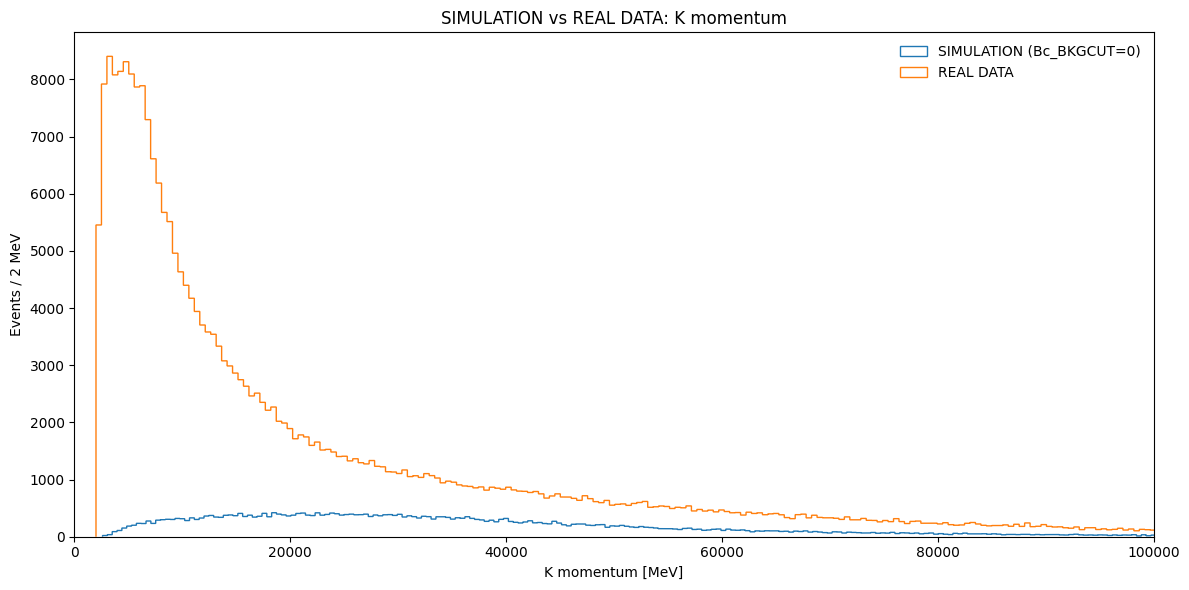

In [146]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data['K_P'], bins=1000, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data['K_P'], bins=1000, histtype='step', label='REAL DATA')
ax.set_xlabel('K momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: K momentum')

ax.set_xlim(0, 100000)

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

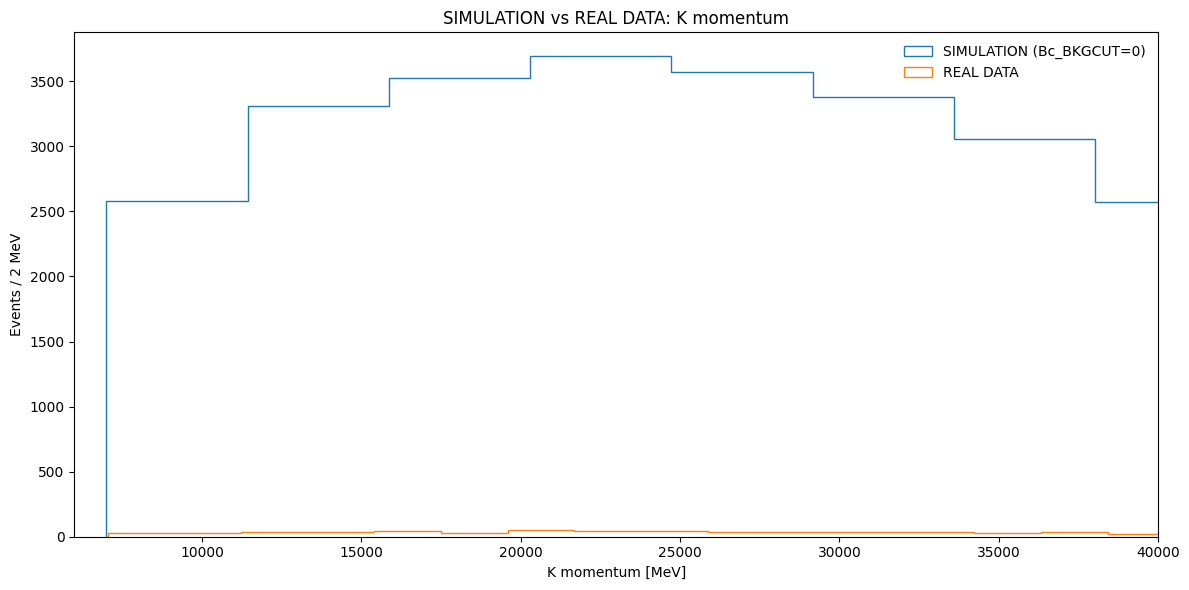

In [147]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data.query(Selection)['K_P'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Selection)['K_P'], bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('K momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: K momentum')

ax.set_xlim(6000, 40000)

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

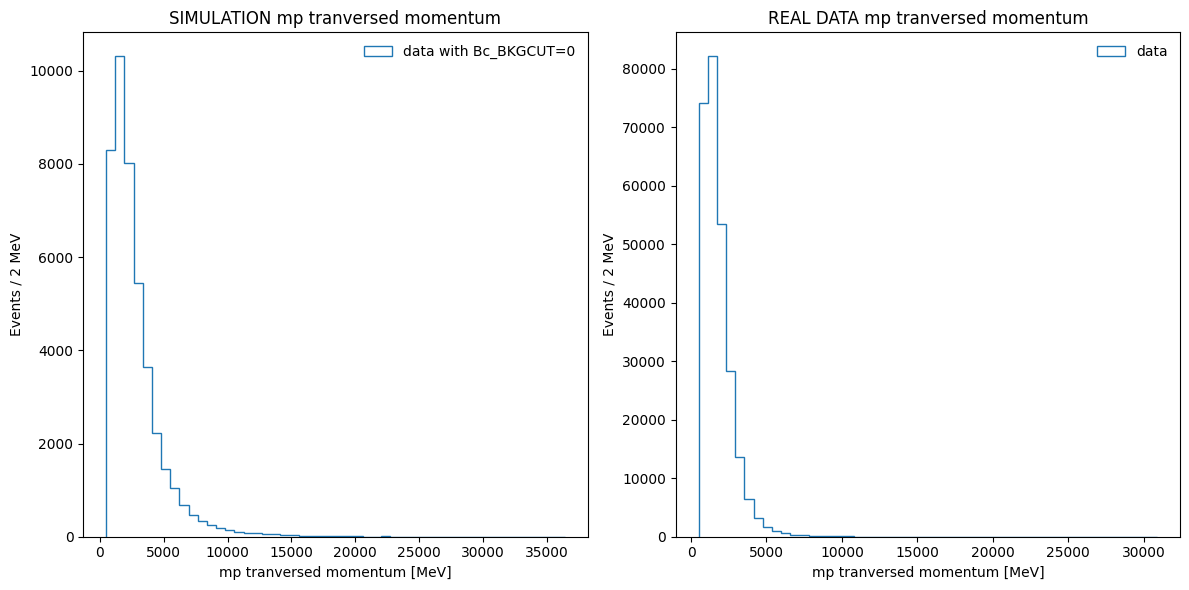

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mp tranversed momentum
axes[0].hist(simu_data['mp_PT'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mp tranversed momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mp tranversed momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA mp tranversed momentum
axes[1].hist(real_data['mp_PT'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('mp tranversed momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mp tranversed momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

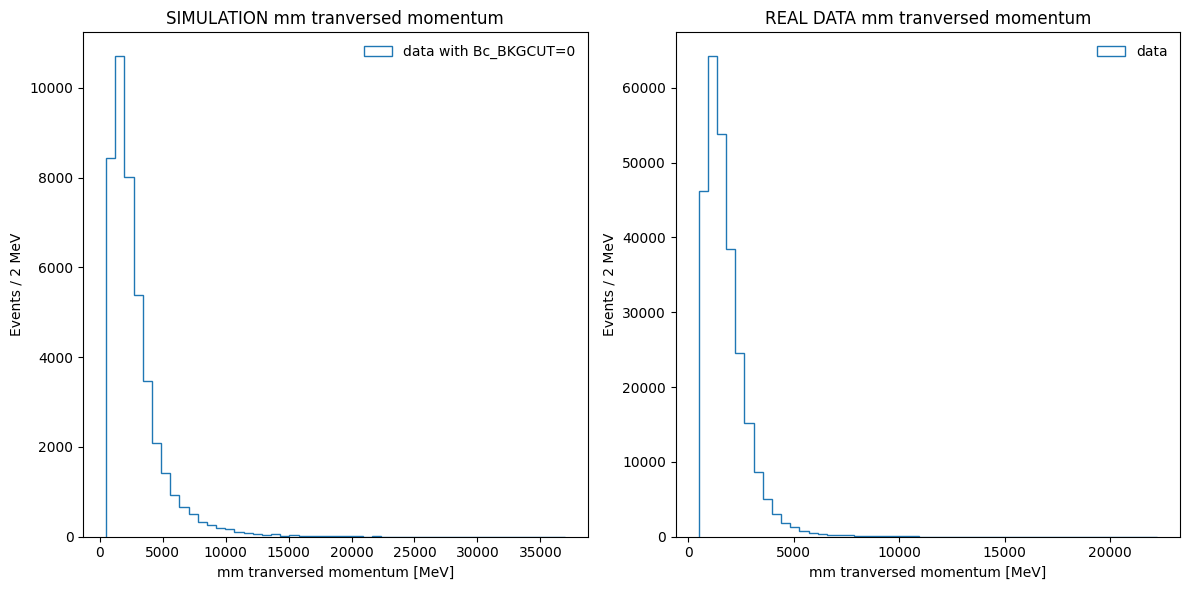

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mm tranversed momentum
axes[0].hist(simu_data['mm_PT'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mm tranversed momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mm tranversed momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA mm tranversed momentum
axes[1].hist(real_data['mm_PT'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('mm tranversed momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mm tranversed momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

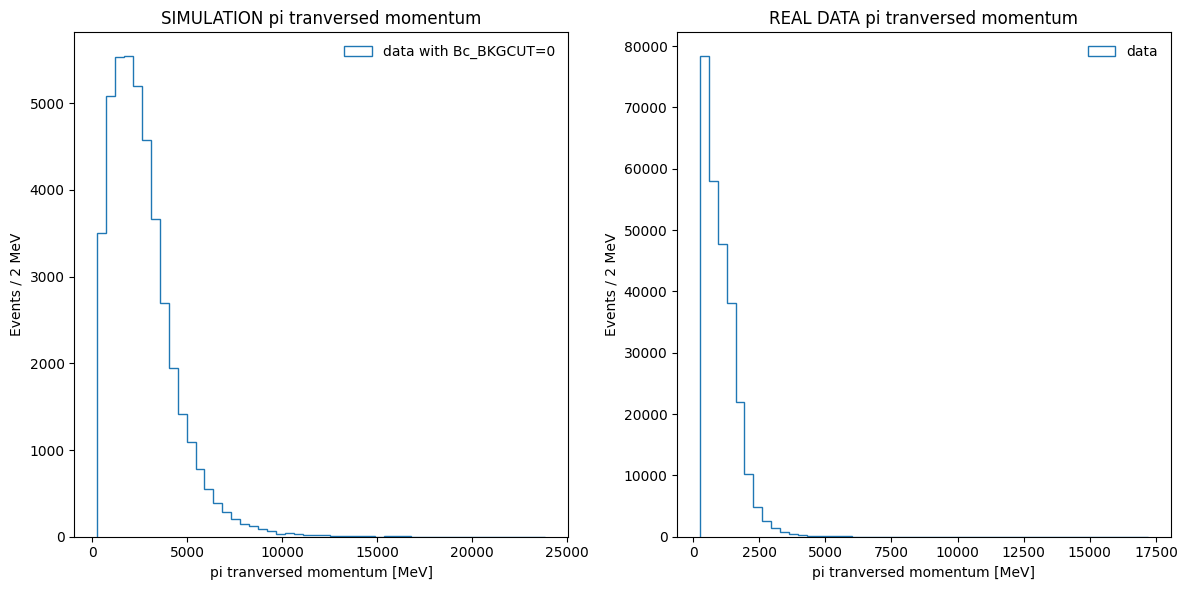

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi tranversed momentum
axes[0].hist(simu_data['pi_PT'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi tranversed momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi tranversed momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi tranversed momentum
axes[1].hist(real_data['pi_PT'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi tranversed momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi tranversed momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

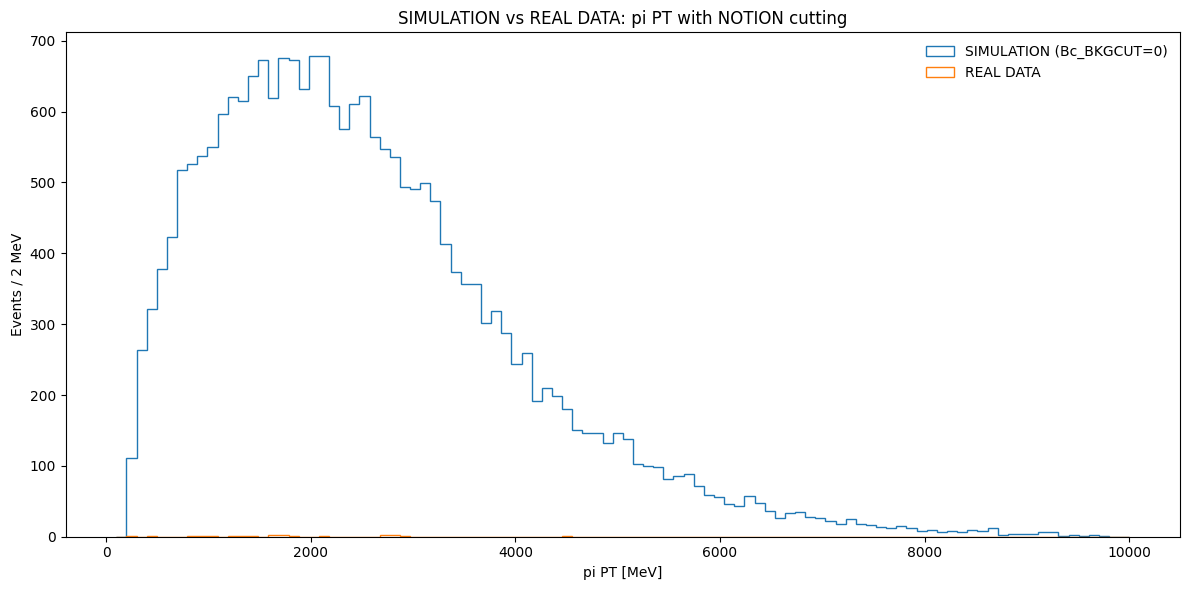

In [151]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data.query(Notion_selection)['pi_PT'], range=(100,10000), bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Notion_selection)['pi_PT'], range=(100,10000), bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('pi PT [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: pi PT with NOTION cutting')

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

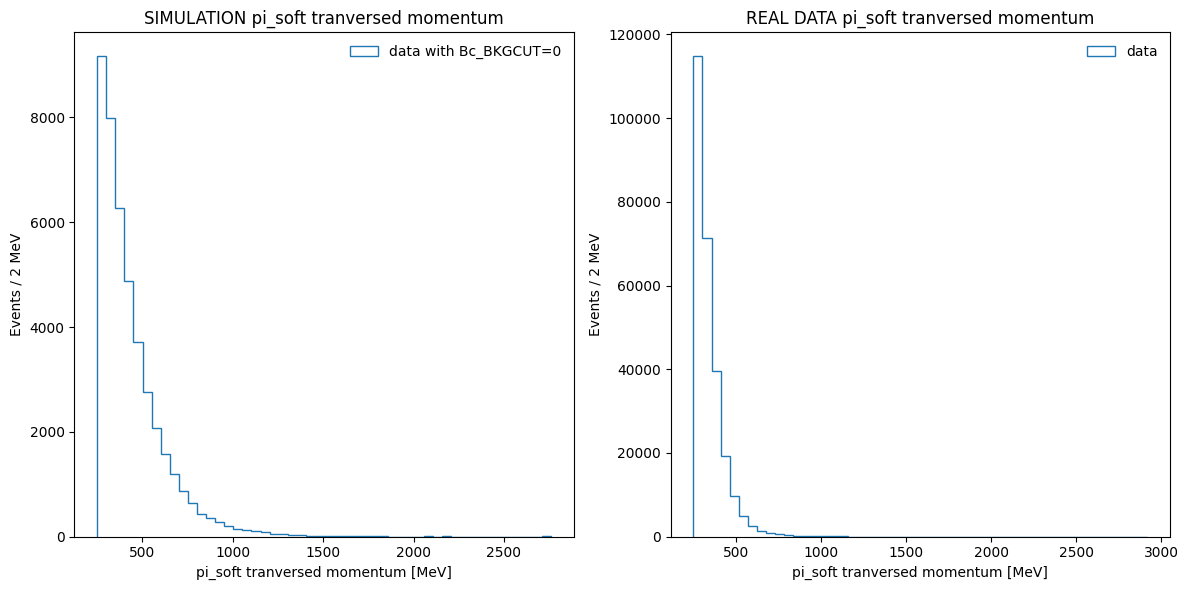

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi_soft tranversed momentum
axes[0].hist(simu_data['pi_soft_PT'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi_soft tranversed momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi_soft tranversed momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi_soft tranversed momentum
axes[1].hist(real_data['pi_soft_PT'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi_soft tranversed momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi_soft tranversed momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

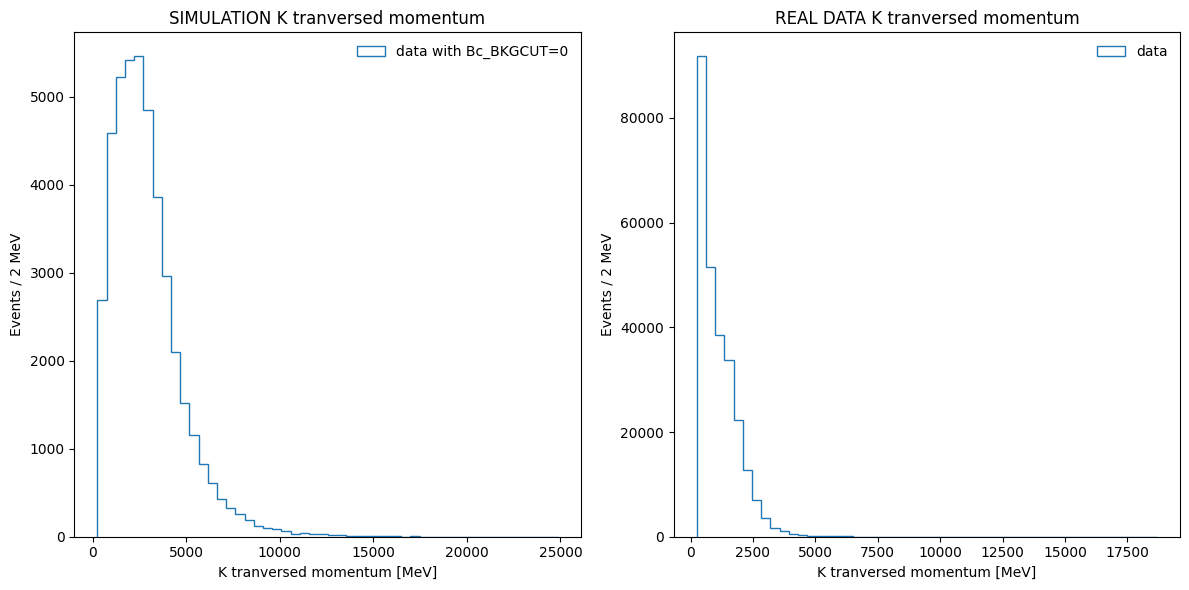

Minimum value of K_PT in simulation data: 250.22158452864176 MeV
Minimum value of K_PT in real data: 250.00666108115823 MeV


In [153]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION K tranversed momentum
axes[0].hist(simu_data['K_PT'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('K tranversed momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION K tranversed momentum')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA K tranversed momentum
axes[1].hist(real_data['K_PT'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('K tranversed momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA K tranversed momentum')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

min_simu_K_PT = simu_data['K_PT'].min()
print(f"Minimum value of K_PT in simulation data: {min_simu_K_PT} MeV")

min_real_K_PT = real_data['K_PT'].min()
print(f"Minimum value of K_PT in real data: {min_real_K_PT} MeV")

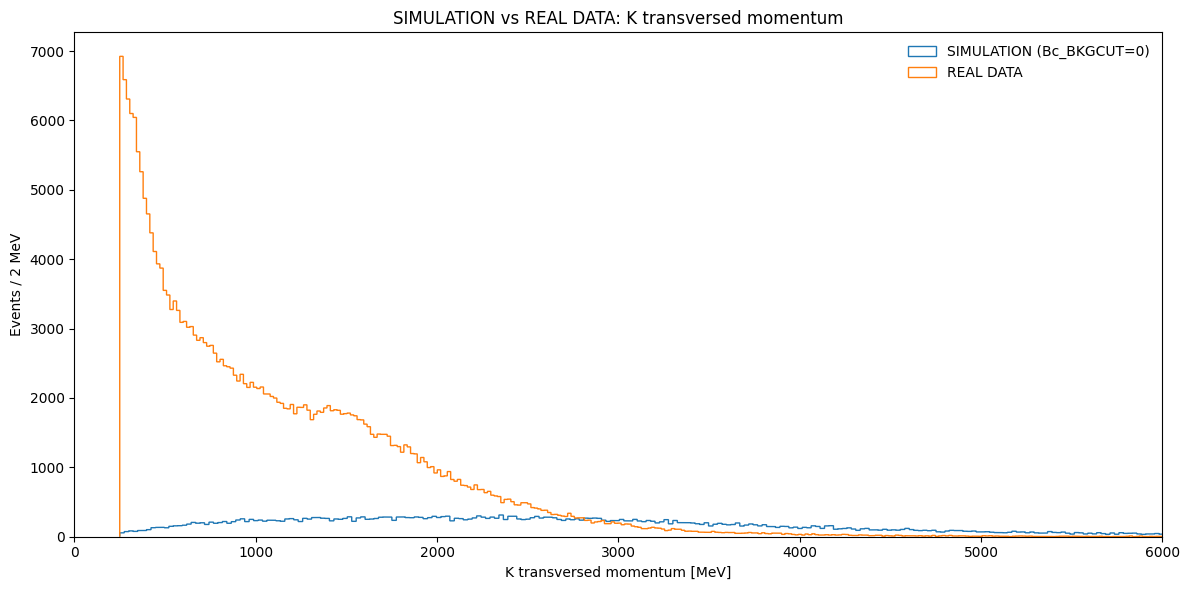

In [154]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data['K_PT'], bins=1000, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data['K_PT'], bins=1000, histtype='step', label='REAL DATA')
ax.set_xlabel('K transversed momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: K transversed momentum')

ax.set_xlim(0, 6000)

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

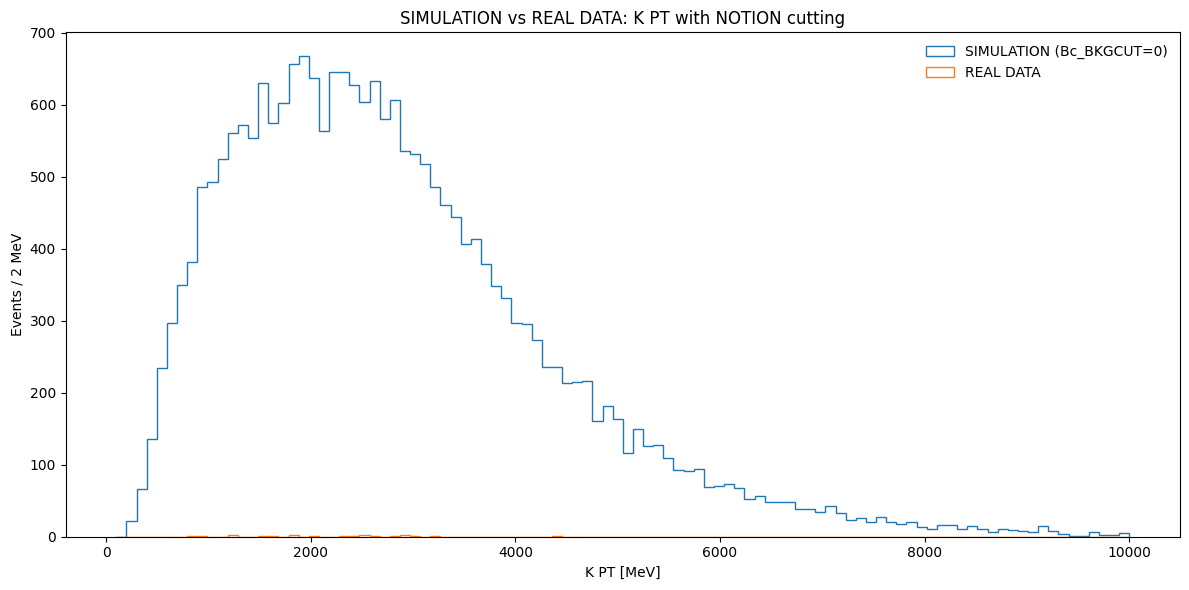

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data.query(Notion_selection)['K_PT'], range=(100,10000), bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Notion_selection)['K_PT'], range=(100,10000), bins=100, histtype='step', label='REAL DATA')
ax.set_xlabel('K PT [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: K PT with NOTION cutting')

ax.legend(frameon=False)

plt.tight_layout()

plt.show()

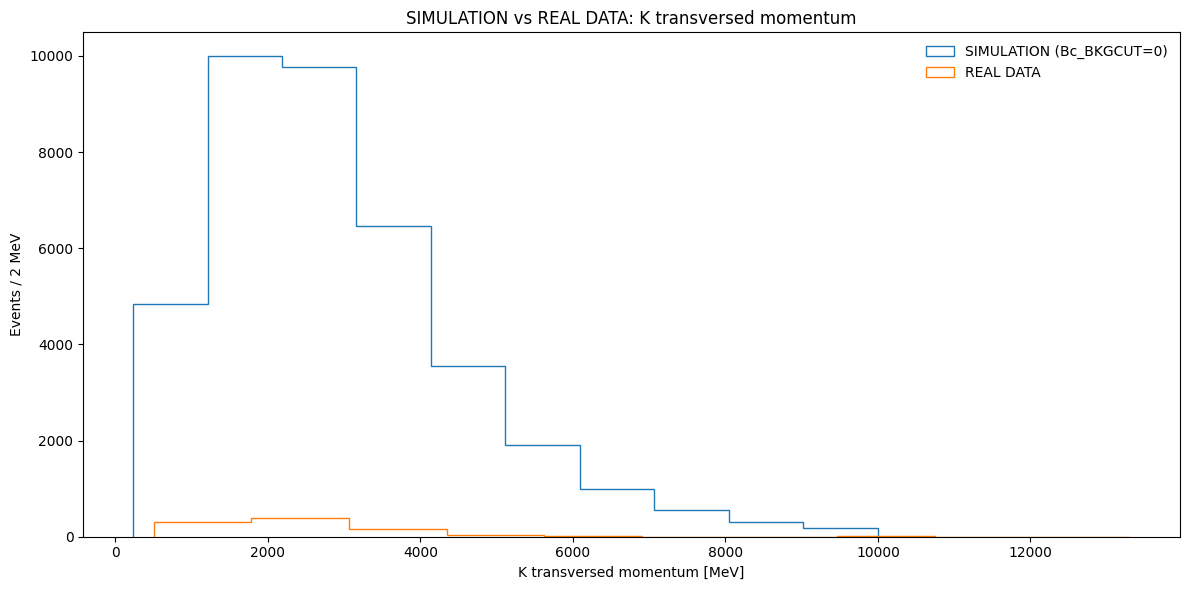

In [156]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data.query(Selection)['K_PT'], range=(230,10000), bins=10, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')

ax.hist(real_data.query(Selection)['K_PT'], bins=10, histtype='step', label='REAL DATA')
ax.set_xlabel('K transversed momentum [MeV]')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('SIMULATION vs REAL DATA: K transversed momentum')


ax.legend(frameon=False)

plt.tight_layout()

plt.show()

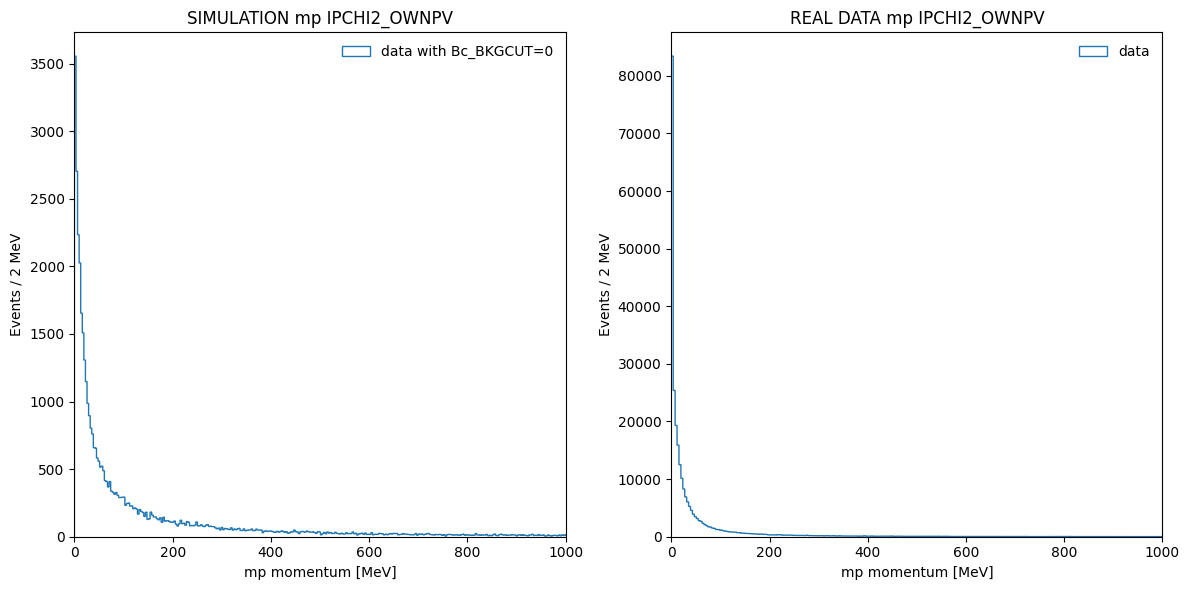

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mp IPCHI2_OWNPV
axes[0].hist(simu_data['mp_IPCHI2_OWNPV'], bins=10000, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mp momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mp IPCHI2_OWNPV')
axes[0].legend(frameon=False)
axes[0].set_xlim(0, 1000)

# Second subplot: REAL DATA mp IPCHI2_OWNPV
axes[1].hist(real_data['mp_IPCHI2_OWNPV'], bins=10000, histtype='step', label='data')
axes[1].set_xlabel('mp momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mp IPCHI2_OWNPV')
axes[1].legend(frameon=False)
axes[1].set_xlim(0, 1000)

plt.tight_layout()
plt.show()

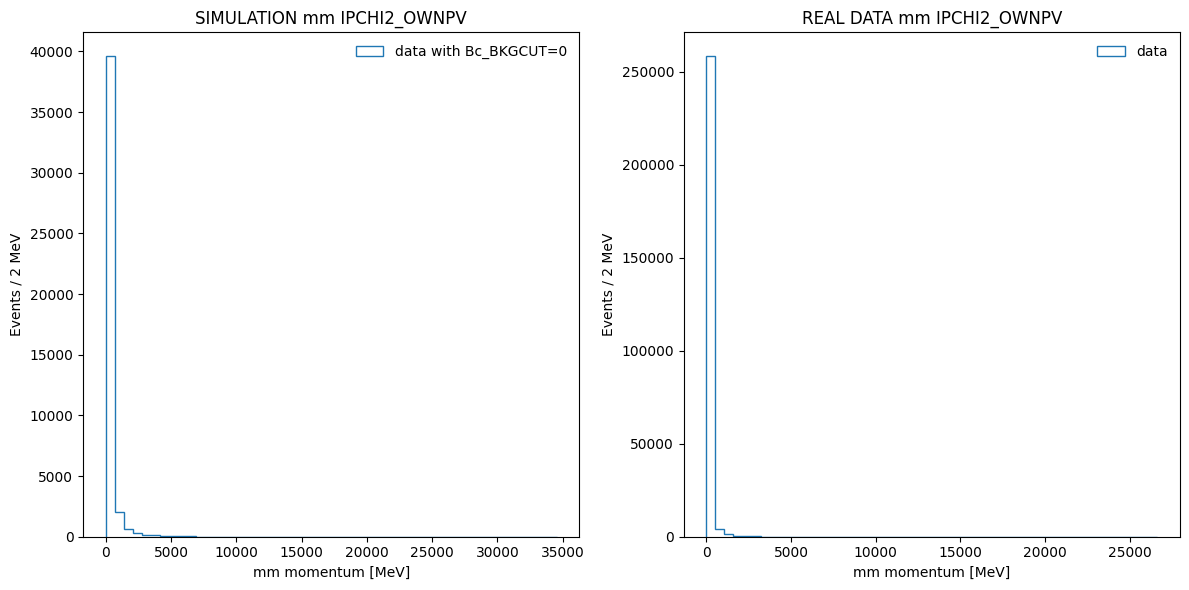

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION mm IPCHI2_OWNPV
axes[0].hist(simu_data['mm_IPCHI2_OWNPV'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('mm momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION mm IPCHI2_OWNPV')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA mm IPCHI2_OWNPV
axes[1].hist(real_data['mm_IPCHI2_OWNPV'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('mm momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA mm IPCHI2_OWNPV')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

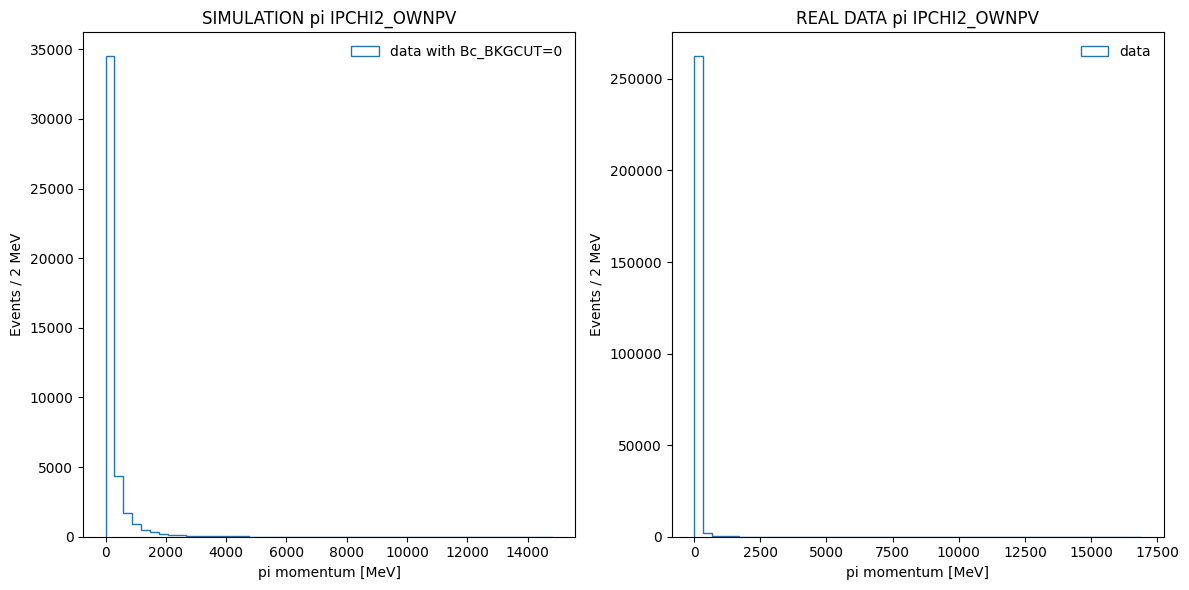

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi IPCHI2_OWNPV
axes[0].hist(simu_data['pi_IPCHI2_OWNPV'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi IPCHI2_OWNPV')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi IPCHI2_OWNPV
axes[1].hist(real_data['pi_IPCHI2_OWNPV'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi IPCHI2_OWNPV')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

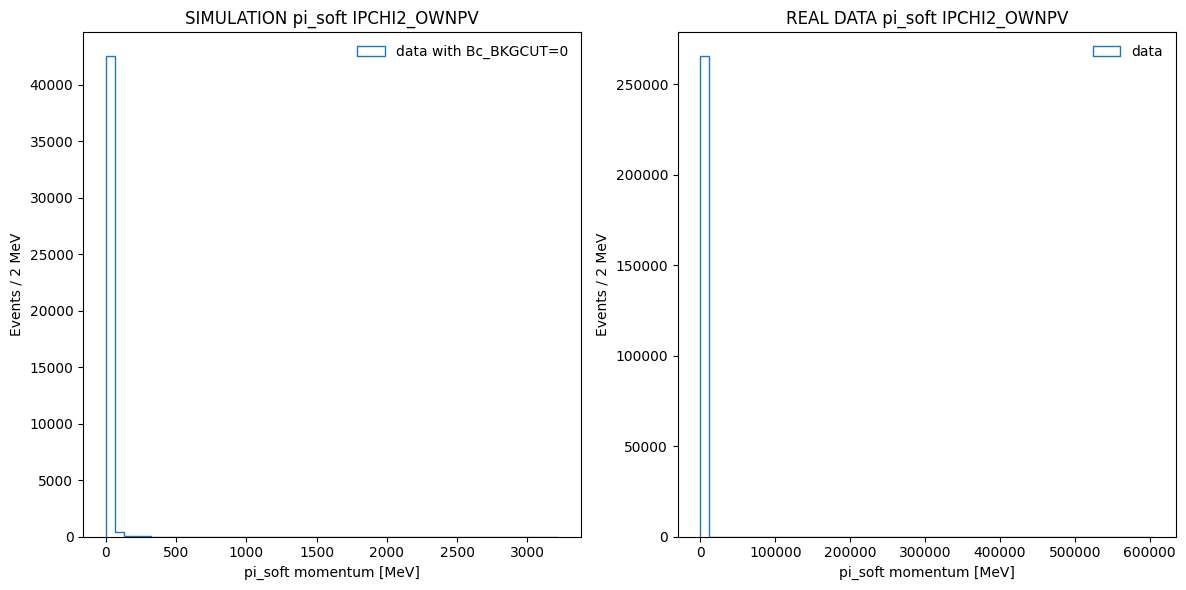

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION pi_soft IPCHI2_OWNPV
axes[0].hist(simu_data['pi_soft_IPCHI2_OWNPV'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('pi_soft momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION pi_soft IPCHI2_OWNPV')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA pi_soft IPCHI2_OWNPV
axes[1].hist(real_data['pi_soft_IPCHI2_OWNPV'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('pi_soft momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA pi_soft IPCHI2_OWNPV')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

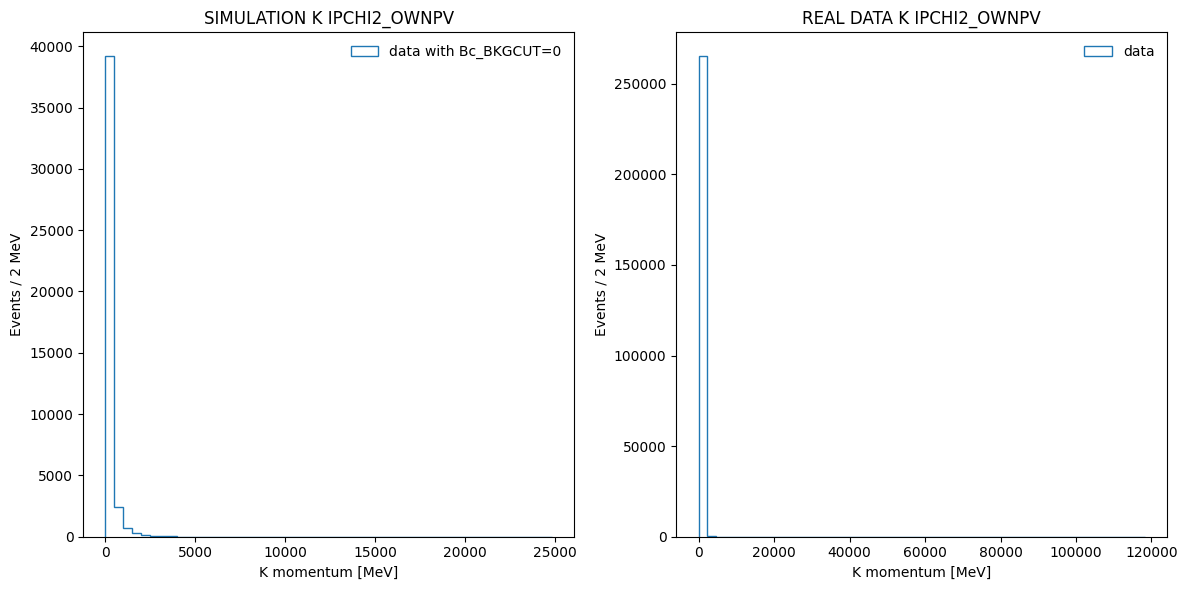

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: SIMULATION K IPCHI2_OWNPV
axes[0].hist(simu_data['K_IPCHI2_OWNPV'], bins=50, histtype='step', label='data with Bc_BKGCUT=0')
axes[0].set_xlabel('K momentum [MeV]')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION K IPCHI2_OWNPV')
axes[0].legend(frameon=False)

# Second subplot: REAL DATA K IPCHI2_OWNPV
axes[1].hist(real_data['K_IPCHI2_OWNPV'], bins=50, histtype='step', label='data')
axes[1].set_xlabel('K momentum [MeV]')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('REAL DATA K IPCHI2_OWNPV')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()